# Create time series plots for all relevant parameters

List of parameters:
- MLD depth
- nitrogen dynamics
- silicate dynamics
- PAR / irradiance
- some kind of detritus/turbidity measure
- primary production
- chl a
- phytoplankton abundances
- zooplankton abundances


In [64]:
require(tidyverse, warn.conflicts = FALSE)
require(cowplot, warn.conflicts = FALSE)

library(scales, warn.conflicts = FALSE)

## First of all, let's read all data

In [8]:
#MLD
mld_depth <- read.csv("DATA_processed/MLD_depth_calculated.csv")
mld_depth$Date <- as.Date(mld_depth$Date, format="%Y-%m-%d")

# read CTDdat file
ctd <- read.csv("DATA_processed/CTDdat_processed.csv")
ctd$Date <- as.Date(ctd$Date, format="%Y-%m-%d")

#Niskin
niskin <- read.csv("DATA_processed/Niskin_bottle_processed.csv")
niskin$Date <- as.Date(niskin$Date, format="%Y-%m-%d")

#Niskin below MLD
niskinMLD <- read.csv("DATA_processed/Niskin_at_MLD_filtered.csv")
niskinMLD$Date <- as.Date(niskinMLD$Date, format="%Y-%m-%d")

#Niskin above MLD
niskinAboveMLD <- read.csv("DATA_processed/Niskin_above_MLD.csv")
niskinAboveMLD$Date <- as.Date(niskinAboveMLD$Date, format="%Y-%m-%d")

#PAR
SeaWIFs <- read.csv('DATA_processed/SeaWIFs_monthly_extracted.csv')
date = as.character(paste(SeaWIFs$year,'-',SeaWIFs$month,'-15',sep=''))
SeaWIFs$Date <- as.Date(date, format='%Y-%m-%d')

#euphotic depth
SeaWIFs_Zeu_lee <- read.csv('DATA_processed/SeaWIFs_EuphoticDepth_extracted.csv')
date = as.character(paste(SeaWIFs_Zeu_lee$year,'-',SeaWIFs_Zeu_lee$month,'-15',sep=''))
SeaWIFs_Zeu_lee$Date <- as.Date(date, format='%Y-%m-%d')

#PhytoAbundances
phyto_filtered <- read.csv("DATA_processed/PhytoAbund_filtered.csv")
phyto_filtered$date <- as.Date(phyto_filtered$date, format="%Y-%m-%d")

#PhytoAbundances above MLD
phyto_above_MLD <- read.csv("DATA_processed/Phyto_above_MLD.csv")
phyto_above_MLD$date <- as.Date(phyto_above_MLD$Date, format="%Y-%m-%d")

#Zooplankton
zoo <- read.csv("DATA_processed/Master_Zooplankton_Nov2017_Cleaned.csv")
zoo$date <- as.Date(zoo$Date, format="%Y-%m-%d")

# MLD depth

In [9]:
head(mld_depth)

X.1,X,CruiseID,Date,month,days,press,lat,lon,sigma_t,sigma_0,potemp,sal,temp,beam_att,beam_cp,fluor_chla,belowmld
1,12,93HG_001,1995-11-08,11,311,24.138,10.5,-64.67,23.982,23.984,26.711,36.663,26.717,NA,NA,NA,TRUE
2,638,93HG_002,1995-12-13,12,346,18.103,10.5,-64.67,24.712,24.684,25.330,36.906,25.334,NA,NA,NA,TRUE
3,1240,93HG_003,1996-01-12,1,11,28.162,10.5,-64.67,25.174,25.175,23.727,36.913,23.733,NA,NA,NA,TRUE
4,1813,93HG_004,1996-02-13,2,43,24.138,10.5,-64.67,25.348,25.350,23.206,36.943,23.211,NA,NA,NA,TRUE
5,2437,93HG_005,1996-03-13,3,72,14.080,10.5,-64.67,25.609,25.610,22.113,36.873,22.116,NA,NA,NA,TRUE
6,3741,93HG_006,1996-04-16,4,106,10.057,10.5,-64.67,25.578,25.579,22.343,36.893,22.345,NA,NA,NA,TRUE


In [10]:
df <- mld_depth %>%
  select(Date, press) %>%
  gather(key='key',value = "value", -Date)
head(df)

Date,key,value
1995-11-08,press,24.138
1995-12-13,press,18.103
1996-01-12,press,28.162
1996-02-13,press,24.138
1996-03-13,press,14.080
1996-04-16,press,10.057


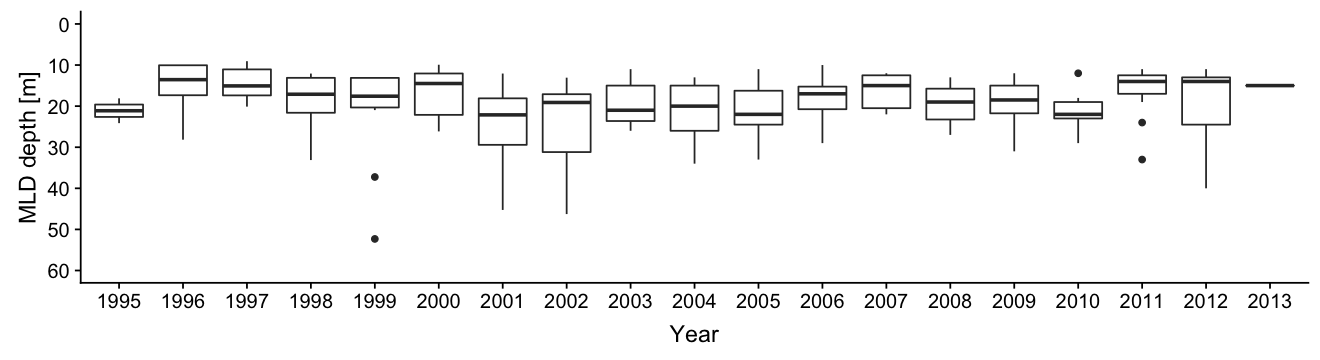

In [136]:
dfTOT <- df
dfTOT$monthyear <- as.Date(format(df$Date, format="%Y-%m"), format="%m-%d")
dfTOT$year <- as.numeric(format(df$Date, format="%Y"))

options(repr.plot.width=11, repr.plot.height=3)
# plot boxplot of distribution over the year per group
ggplot(dfTOT) + geom_boxplot(aes(x=reorder(year,monthyear), y=value))+ scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
ylab('MLD depth [m]') + xlab('Year')

In [137]:
ggsave('PLOTS/MLD_BOXPLOTS_total.png', width=11, height= 3)

# SPLIT ALL DATA INTO REGIMES; AND THEN PLOT

In [23]:
#split data into two regimes:
dfR1 <- df[!df$Date>as.Date('2000-10-30') & !df$Date<as.Date('1996-01-01'),]
dfR2 <- df[!df$Date<as.Date('2006-07-31') & !df$Date>as.Date('2010-12-31'),]

In [24]:
tail(dfR1)

,Date,key,value
54,2000-05-11,press,12.016
55,2000-06-06,press,26.089
56,2000-07-07,press,9.927
57,2000-08-09,press,21.125
58,2000-09-12,press,11.061
59,2000-10-10,press,13.116


In [90]:
# create day of year and month columsn for aggregate plotting
dfR1$dyear <- as.Date(format(dfR1$Date, format="%m-%d"),format="%m-%d")
dfR2$dyear <- as.Date(format(dfR2$Date, format="%m-%d"),format="%m-%d")
dfR1$month <- format(dfR1$Date, format="%m")
dfR2$month <- format(dfR2$Date, format="%m")

In [91]:
head(dfR1)

,Date,key,value,dyear,month
3,1996-01-12,press,28.162,2019-01-12,01
4,1996-02-13,press,24.138,2019-02-13,02
5,1996-03-13,press,14.080,2019-03-13,03
6,1996-04-16,press,10.057,2019-04-16,04
7,1996-05-09,press,10.057,2019-05-09,05
8,1996-06-12,press,15.086,2019-06-12,06


In [104]:
options(repr.plot.width=11, repr.plot.height=3)
MLD1 <- ggplot() + geom_point(data=dfR1,aes(x=dyear, y=value, col='Regime 1'))+ scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_point(data=dfR2,aes(x=dyear, y=value, col='Regime 2')) + 
scale_x_date(date_breaks = "months", labels = date_format('%m'))+
ylab('MLD depth [m]') + xlab('Month of year') + labs(col='Regime')

In [105]:
# plot boxplot of distribution over the year per group
MLD2 <- ggplot() + geom_boxplot(data=dfR1,aes(x=reorder(month,dyear), y=value, col='Regime 1'))+ scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_boxplot(data=dfR2,aes(x=reorder(month,dyear), y=value, col='Regime 2'), alpha=0.5)+ 
#scale_x_continous(breaks = "months", labels = date_format('%m'))+
ylab('MLD depth [m]') + xlab('Month of year') + labs(col='Regime')

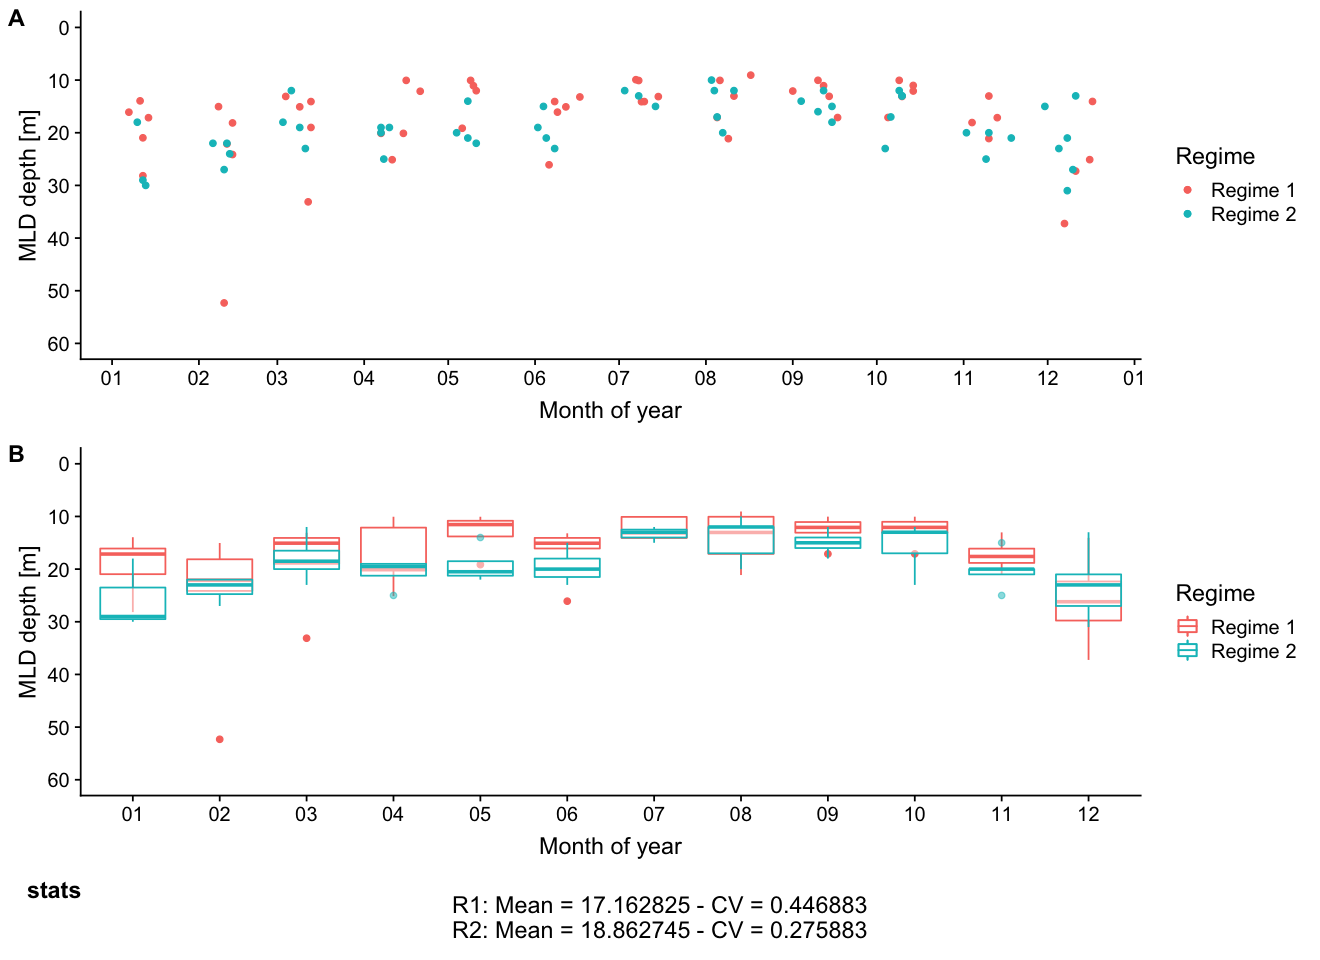

In [131]:
options(repr.plot.width=11, repr.plot.height=8)
MLDmeanR1 <- mean(dfR1$value)
MLDmeanR2 <- mean(dfR2$value)
MLDcvR1 <- sd(dfR1$value)/mean(dfR1$value)
MLDcvR2 <- sd(dfR2$value)/mean(dfR2$value)
MLDstats <- ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", MLDmeanR1, MLDcvR1, MLDmeanR2, MLDcvR2))
plot_grid(MLD1, MLD2, MLDstats, ncol = 1,labels = c("A", "B","stats"), rel_heights = c(1,1,0.2))

In [132]:
ggsave('PLOTS/MLD_splitperREGIME.png', width=11, height= 8)

# How does this correlate to ENSO index? -> Taylor et al.

just by the variability, it doesn't seem that variable... perhaps depth of euphotic zone is important  
ressource supply index -> emilio publication  
  
combines light and nutrient availablitly   
  
# compare different regimes
use principal components?   
  
Miriam Schluter -> Ago's PhD Student show publications -> regime shift in the north sea!  
check methods for identifying regime shift  
  
just google scholar regime shift.. time series analysis  
glmm for correctiong for autocorrelation, "generalized mixed models for ecology" book with one relevant chapter  
  
# not get too complicated!  
copy regimes from pinckney et al.  
  
# PAR varies...   
so look at light attenuation coeff!!!  euphotic depth take it from sattelites!!   
"light penetration might make the difference between regimes"  
  
calculate euphotic depth!  
calculate RSI!  
  
# look at coefficient of variability  
for each time-step  
then plot it over time and mark 2 regimes  
plot it together with mean...  
to check for regime shift  
  

# Nitrogen dynamics below MLD

In [138]:
NO2NO3df <- niskinMLD %>%
  select(Date, NO3_NO2) %>%
  gather(key='key',value = "value", -Date)
head(NO2NO3df)

Date,key,value
1995-11-08,NO3_NO2,NA
1995-12-13,NO3_NO2,NA
1996-01-12,NO3_NO2,NA
1996-02-13,NO3_NO2,NA
1996-03-13,NO3_NO2,NA
1996-04-16,NO3_NO2,NA


Warning message:
“Removed 62 rows containing non-finite values (stat_boxplot).”

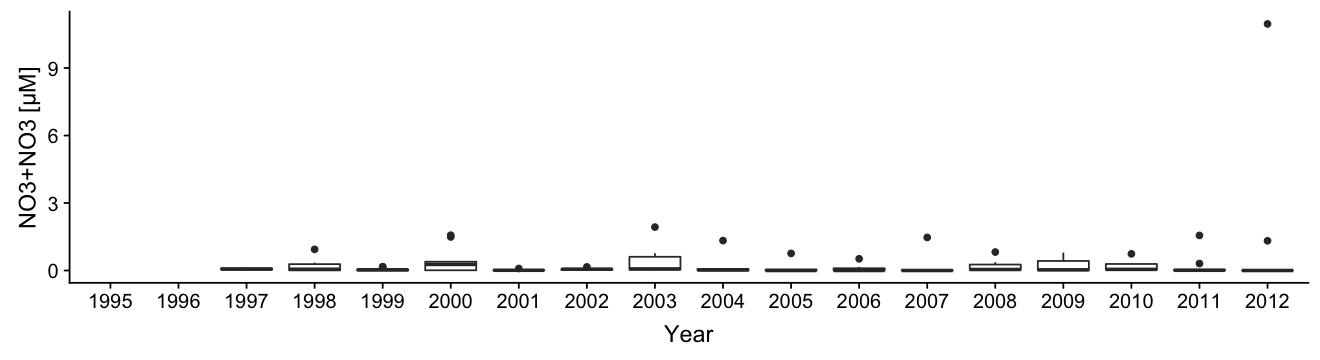

In [160]:
NO2NO3dfTOT <- NO2NO3df
NO2NO3dfTOT$monthyear <- as.Date(format(NO2NO3df$Date, format="%Y-%m"), format="%m-%d")
NO2NO3dfTOT$year <- as.numeric(format(NO2NO3df$Date, format="%Y"))

options(repr.plot.width=11, repr.plot.height=3)
# plot boxplot of distribution over the year per group
ggplot(NO2NO3dfTOT) + geom_boxplot(aes(x=reorder(year,monthyear), y=value))+ #scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
ylab('NO3+NO3 [µM]') + xlab('Year')

In [161]:
ggsave('PLOTS/no2no3_BOXPLOT_total.png', width=11, height= 3)

Warning message:
“Removed 62 rows containing non-finite values (stat_boxplot).”

In [147]:
#split data into two regimes:
NO2NO3dfR1 <- NO2NO3df[!NO2NO3df$Date>as.Date('2000-10-30') & !NO2NO3df$Date<as.Date('1996-01-01'),]
NO2NO3dfR2 <- NO2NO3df[!NO2NO3df$Date<as.Date('2006-07-31') & !NO2NO3df$Date>as.Date('2010-12-31'),]

In [148]:
# create day of year and month columsn for aggregate plotting
NO2NO3dfR1$dyear <- as.Date(format(NO2NO3dfR1$Date, format="%m-%d"),format="%m-%d")
NO2NO3dfR2$dyear <- as.Date(format(NO2NO3dfR2$Date, format="%m-%d"),format="%m-%d")
NO2NO3dfR1$month <- format(NO2NO3dfR1$Date, format="%m")
NO2NO3dfR2$month <- format(NO2NO3dfR2$Date, format="%m")

In [149]:
head(NO2NO3dfR1)

,Date,key,value,dyear,month
3,1996-01-12,NO3_NO2,NA,2019-01-12,01
4,1996-02-13,NO3_NO2,NA,2019-02-13,02
5,1996-03-13,NO3_NO2,NA,2019-03-13,03
6,1996-04-16,NO3_NO2,NA,2019-04-16,04
7,1996-05-09,NO3_NO2,NA,2019-05-09,05
8,1996-06-12,NO3_NO2,NA,2019-06-12,06


In [155]:
options(repr.plot.width=11, repr.plot.height=3)

NO2NO3_1 <- ggplot() + geom_point(data=NO2NO3dfR1,aes(x=dyear, y=value, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_point(data=NO2NO3dfR2,aes(x=dyear, y=value, col='Regime 2')) + 
scale_x_date(date_breaks = "months", labels = date_format('%m'))+
ylab('NO3+NO3 [µM]') + xlab('Month of year') + labs(col='Regime')

In [156]:
NO2NO3_2 <- ggplot() + geom_boxplot(data=NO2NO3dfR1,aes(x=reorder(month,dyear), y=value, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_boxplot(data=NO2NO3dfR2,aes(x=reorder(month,dyear), y=value, col='Regime 2'), alpha=0.5)+ 
#scale_x_continous(breaks = "months", labels = date_format('%m'))+
ylab('NO3+NO3 [µM]') + xlab('Month of year') + labs(col='Regime')

Warning message:
“Removed 30 rows containing missing values (geom_point).”Warning message:
“Removed 10 rows containing missing values (geom_point).”Warning message:
“Removed 30 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 10 rows containing non-finite values (stat_boxplot).”

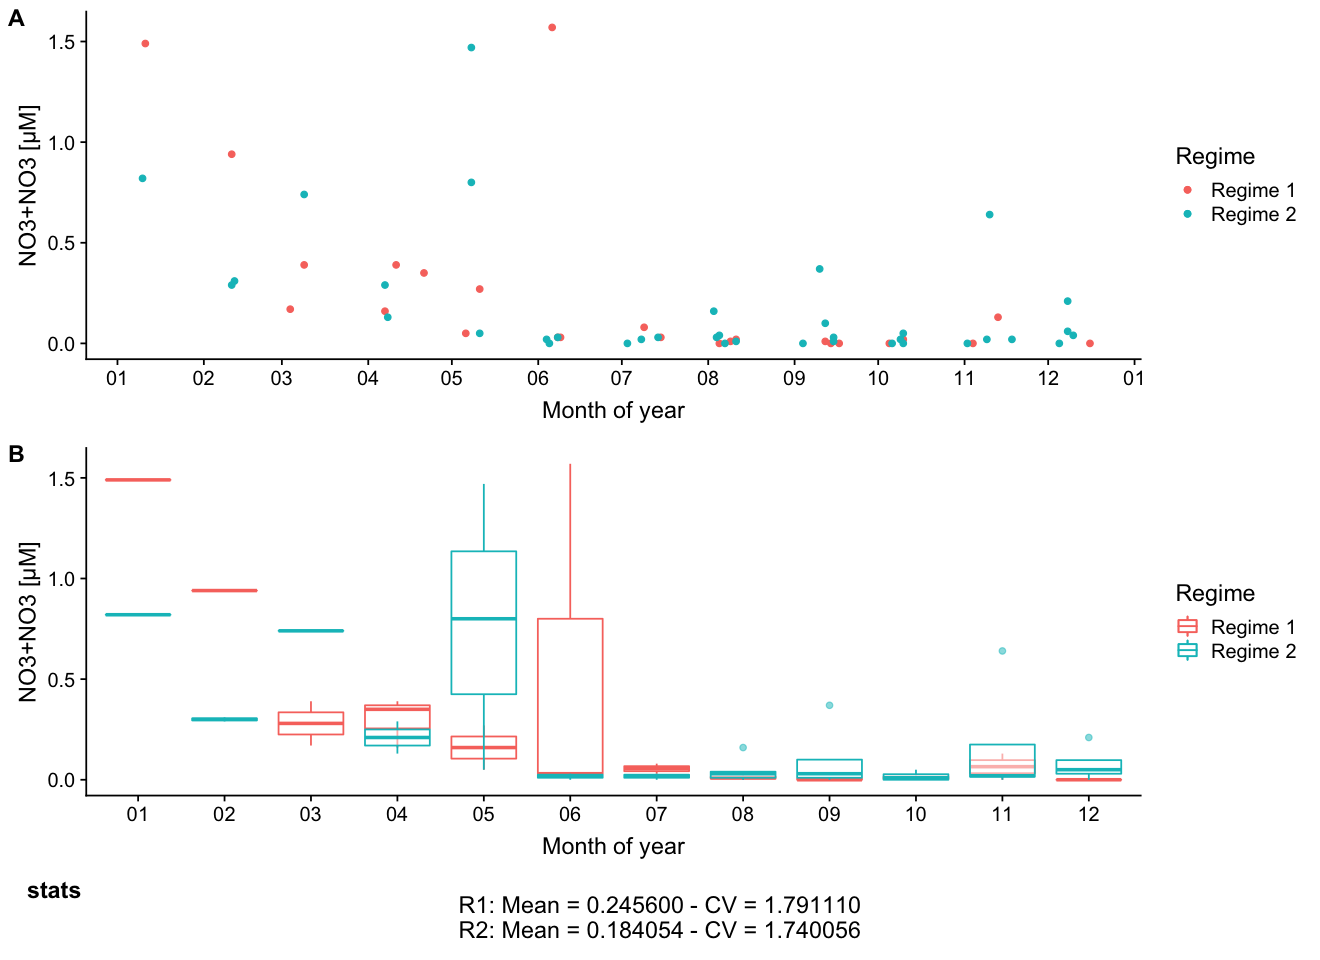

In [158]:
options(repr.plot.width=11, repr.plot.height=8)
NO2NO3meanR1 <- mean(NO2NO3dfR1$value, na.rm=T)
NO2NO3meanR2 <- mean(NO2NO3dfR2$value, na.rm=T)
NO2NO3cvR1 <- sd(NO2NO3dfR1$value, na.rm=T)/mean(NO2NO3dfR1$value, na.rm=T)
NO2NO3cvR2 <- sd(NO2NO3dfR2$value, na.rm=T)/mean(NO2NO3dfR2$value, na.rm=T)
NO2NO3stats <- ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", NO2NO3meanR1, NO2NO3cvR1, NO2NO3meanR2, NO2NO3cvR2))
plot_grid(NO2NO3_1, NO2NO3_2, NO2NO3stats, ncol = 1,labels = c("A", "B","stats"), rel_heights = c(1,1,0.2))

In [159]:
ggsave('PLOTS/no2no3_splitperREGIME.png', width=11, height= 8)

# Silicate dynamics below MLD

In [162]:
SiOHdf <- niskinMLD %>%
  select(Date, SiOH4) %>%
  gather(key='key',value = "value", -Date)
head(SiOHdf)

Date,key,value
1995-11-08,SiOH4,NA
1995-12-13,SiOH4,NA
1996-01-12,SiOH4,NA
1996-02-13,SiOH4,NA
1996-03-13,SiOH4,NA
1996-04-16,SiOH4,NA


Warning message:
“Removed 60 rows containing non-finite values (stat_boxplot).”

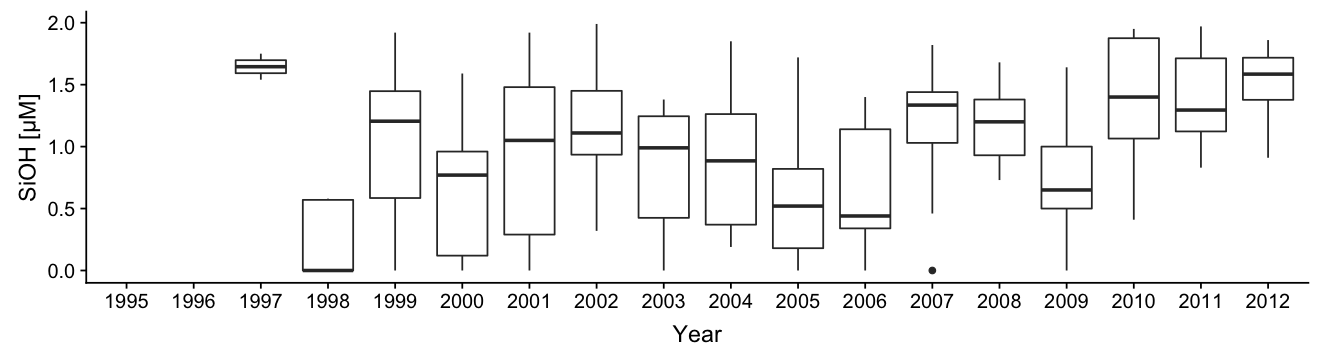

In [163]:
SiOHdfTOT <- SiOHdf
SiOHdfTOT$monthyear <- as.Date(format(SiOHdf$Date, format="%Y-%m"), format="%m-%d")
SiOHdfTOT$year <- as.numeric(format(SiOHdf$Date, format="%Y"))

options(repr.plot.width=11, repr.plot.height=3)
# plot boxplot of distribution over the year per group
ggplot(SiOHdfTOT) + geom_boxplot(aes(x=reorder(year,monthyear), y=value))+ #scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
ylab('SiOH [µM]') + xlab('Year')

In [164]:
ggsave('PLOTS/SiOH_BOXPLOT_total.png', width=11, height= 3)

Warning message:
“Removed 60 rows containing non-finite values (stat_boxplot).”

In [165]:
#split data into two regimes:
SiOHdfR1 <- SiOHdf[!SiOHdf$Date>as.Date('2000-10-30') & !SiOHdf$Date<as.Date('1996-01-01'),]
SiOHdfR2 <- SiOHdf[!SiOHdf$Date<as.Date('2006-07-31') & !SiOHdf$Date>as.Date('2010-12-31'),]

In [166]:
# create day of year and month columsn for aggregate plotting
SiOHdfR1$dyear <- as.Date(format(SiOHdfR1$Date, format="%m-%d"),format="%m-%d")
SiOHdfR2$dyear <- as.Date(format(SiOHdfR2$Date, format="%m-%d"),format="%m-%d")
SiOHdfR1$month <- format(SiOHdfR1$Date, format="%m")
SiOHdfR2$month <- format(SiOHdfR2$Date, format="%m")

In [167]:
head(SiOHdfR1)

,Date,key,value,dyear,month
3,1996-01-12,SiOH4,NA,2019-01-12,01
4,1996-02-13,SiOH4,NA,2019-02-13,02
5,1996-03-13,SiOH4,NA,2019-03-13,03
6,1996-04-16,SiOH4,NA,2019-04-16,04
7,1996-05-09,SiOH4,NA,2019-05-09,05
8,1996-06-12,SiOH4,NA,2019-06-12,06


In [172]:
options(repr.plot.width=11, repr.plot.height=3)

SI1 <- ggplot() + geom_point(data=SiOHdfR1,aes(x=dyear, y=value, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_point(data=SiOHdfR2,aes(x=dyear, y=value, col='Regime 2')) + 
scale_x_date(date_breaks = "months", labels = date_format('%m'))+
ylab('SiOH [µM]') + xlab('Month of year') + labs(col='Regime')

In [173]:
SI2 <- ggplot() + geom_boxplot(data=SiOHdfR1,aes(x=reorder(month,dyear), y=value, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_boxplot(data=SiOHdfR2,aes(x=reorder(month,dyear), y=value, col='Regime 2'), alpha=0.5)+ 
#scale_x_continous(breaks = "months", labels = date_format('%m'))+
ylab('SiOH [µM]') + xlab('Month of year') + labs(col='Regime')

Warning message:
“Removed 29 rows containing missing values (geom_point).”Warning message:
“Removed 13 rows containing missing values (geom_point).”Warning message:
“Removed 29 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 13 rows containing non-finite values (stat_boxplot).”

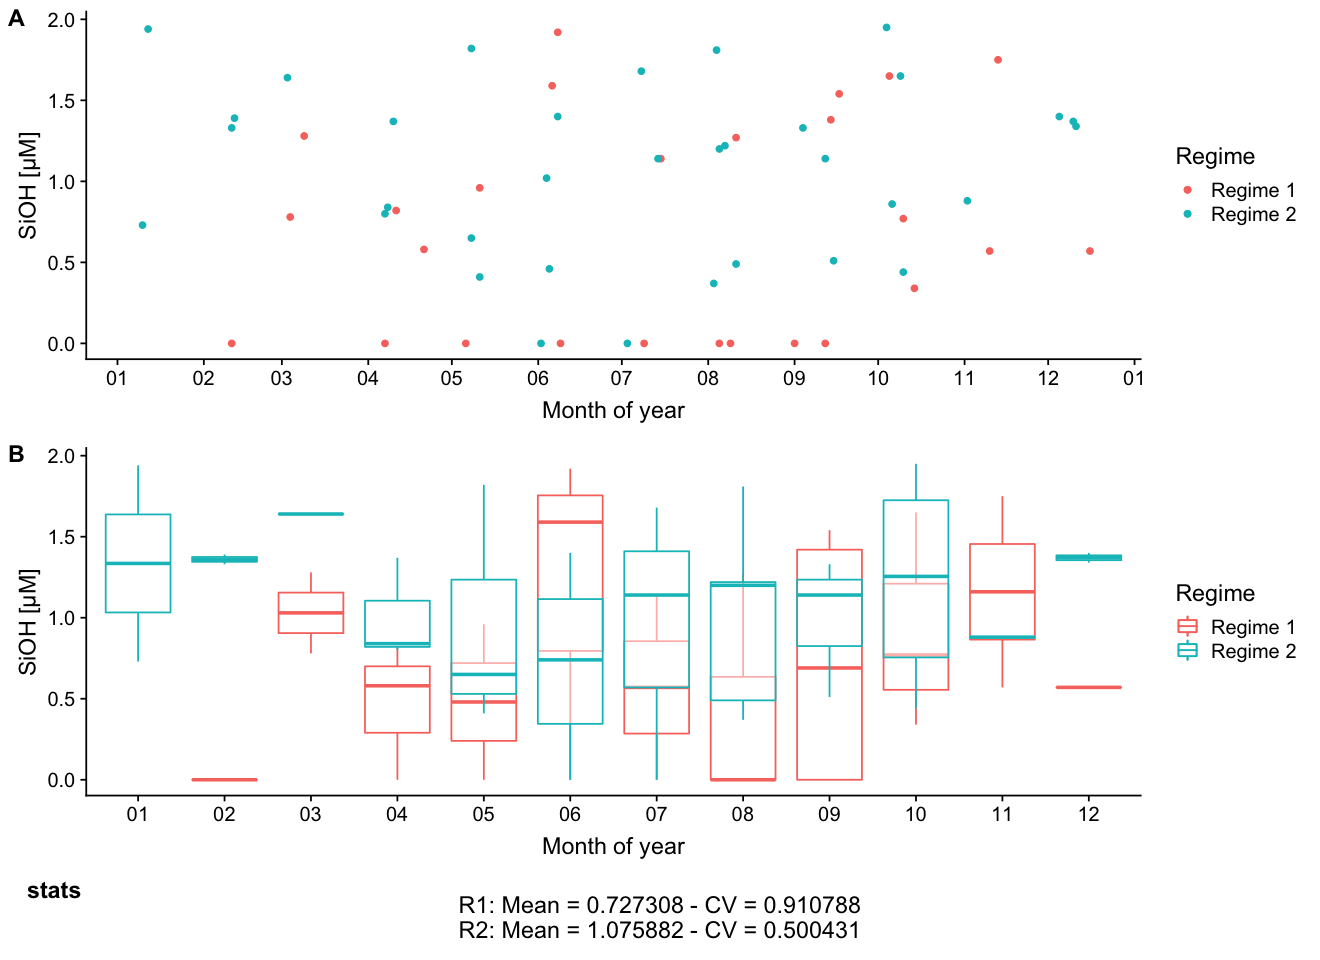

In [174]:
options(repr.plot.width=11, repr.plot.height=8)
SiOHmeanR1 <- mean(SiOHdfR1$value, na.rm=T)
SiOHmeanR2 <- mean(SiOHdfR2$value, na.rm=T)
SiOHcvR1 <- sd(SiOHdfR1$value, na.rm=T)/mean(SiOHdfR1$value, na.rm=T)
SiOHcvR2 <- sd(SiOHdfR2$value, na.rm=T)/mean(SiOHdfR2$value, na.rm=T)
SiOHstats <- ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", SiOHmeanR1, SiOHcvR1, SiOHmeanR2, SiOHcvR2))
plot_grid(SI1, SI2, SiOHstats, ncol = 1,labels = c("A", "B","stats"), rel_heights = c(1,1,0.2))

In [175]:
ggsave('PLOTS/SiOH_splitperREGIME.png', width=11, height= 8)

# PAR irradiance over time

In [56]:
head(SeaWIFs)

year,month,lon,lat,value,unit,var,Date
1997,10,-65.5886,10.54915,50.972,einstein m^-2 day^-1,par,1997-10-15
1997,10,-65.5042,10.54915,50.676,einstein m^-2 day^-1,par,1997-10-15
1997,10,-65.4198,10.54915,50.412,einstein m^-2 day^-1,par,1997-10-15
1997,10,-65.3354,10.54915,51.132,einstein m^-2 day^-1,par,1997-10-15
1997,10,-65.2510,10.54915,51.932,einstein m^-2 day^-1,par,1997-10-15
1997,10,-65.1666,10.54915,51.860,einstein m^-2 day^-1,par,1997-10-15


In [177]:
PARdf_all <- SeaWIFs %>%
    select(Date, value) %>%
    gather(key='key',value = "value", -Date)
head(PARdf_all)

Date,key,value
1997-10-15,value,50.972
1997-10-15,value,50.676
1997-10-15,value,50.412
1997-10-15,value,51.132
1997-10-15,value,51.932
1997-10-15,value,51.860


In [202]:
de<-data.frame(c(as.Date('1996-10-15'),as.Date('1995-10-15'),as.Date('2012-10-15'),as.Date('2013-10-15')),"value",NA)
names(de)<-c("Date","key","value")

newdf <- rbind(PARdf_all, de)
tail(newdf)

,Date,key,value
3059,2010-12-15,value,44.306
3060,2010-12-15,value,45.790
3061,1996-10-15,value,NA
3062,1995-10-15,value,NA
3063,2012-10-15,value,NA
3064,2013-10-15,value,NA


Warning message:
“Removed 4 rows containing missing values (geom_point).”

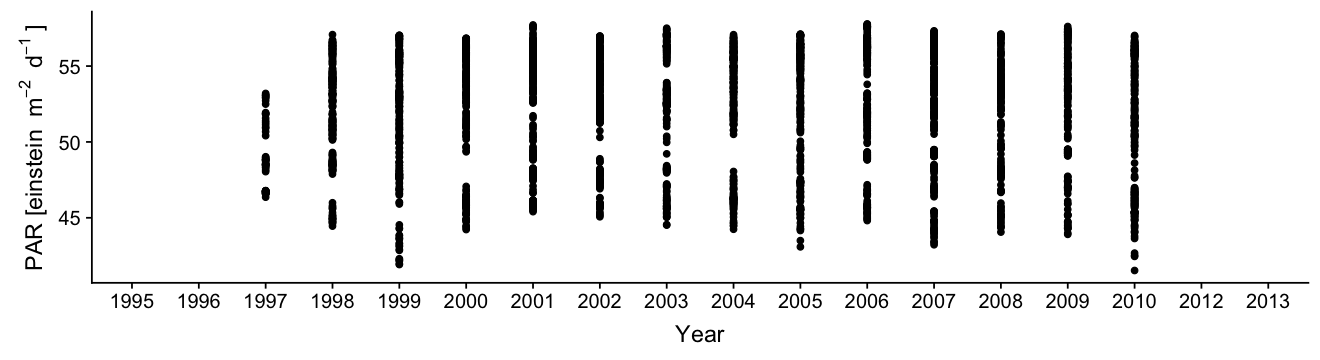

In [206]:
PARdf_allTOT <- newdf
PARdf_allTOT$monthyear <- as.Date(format(newdf$Date, format="%Y-%m"), format="%m-%d")
PARdf_allTOT$year <- as.numeric(format(newdf$Date, format="%Y"))
#PARdf_allTOT$year

options(repr.plot.width=11, repr.plot.height=3)
# plot boxplot of distribution over the year per group
ggplot(PARdf_allTOT) + geom_boxplot(aes(x=reorder(year,monthyear), y=value))+ 
scale_x_discrete(breaks=seq(1995, 2013, by = 1))+
ylab(bquote('PAR [einstein '~m^-2~ ~d^-1~']')) + xlab('Year')

In [204]:
ggsave('PLOTS/PAR_BOXPLOT_total.png', width=11, height= 3)

Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”

In [207]:
#split data into two regimes:
PARdf_allR1 <- PARdf_all[!PARdf_all$Date>as.Date('2000-10-30') & !PARdf_all$Date<as.Date('1996-01-01'),]
PARdf_allR2 <- PARdf_all[!PARdf_all$Date<as.Date('2006-07-31') & !PARdf_all$Date>as.Date('2010-12-31'),]

In [208]:
# create day of year and month columsn for aggregate plotting
PARdf_allR1$dyear <- as.Date(format(PARdf_allR1$Date, format="%m-%d"),format="%m-%d")
PARdf_allR2$dyear <- as.Date(format(PARdf_allR2$Date, format="%m-%d"),format="%m-%d")
PARdf_allR1$month <- format(PARdf_allR1$Date, format="%m")
PARdf_allR2$month <- format(PARdf_allR2$Date, format="%m")

In [209]:
head(PARdf_allR1)

Date,key,value,dyear,month
1997-10-15,value,50.972,2019-10-15,10
1997-10-15,value,50.676,2019-10-15,10
1997-10-15,value,50.412,2019-10-15,10
1997-10-15,value,51.132,2019-10-15,10
1997-10-15,value,51.932,2019-10-15,10
1997-10-15,value,51.860,2019-10-15,10


In [217]:
options(repr.plot.width=11, repr.plot.height=3)

PAR1 <- ggplot() + geom_jitter(data=PARdf_allR1,aes(x=dyear, y=value, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_jitter(data=PARdf_allR2,aes(x=dyear, y=value, col='Regime 2')) + 
scale_x_date(date_breaks = "months", labels = date_format('%m'))+
ylab(bquote('PAR [einstein '~m^-2~ ~d^-1~']')) + xlab('Month of year') + labs(col='Regime')

In [218]:
PAR2 <- ggplot() + geom_boxplot(data=PARdf_allR1,aes(x=reorder(month,dyear), y=value, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_boxplot(data=PARdf_allR2,aes(x=reorder(month,dyear), y=value, col='Regime 2'), alpha=0.5)+ 
#scale_x_continous(breaks = "months", labels = date_format('%m'))+
ylab(bquote('PAR [einstein '~m^-2~ ~d^-1~']')) + xlab('Month of year') + labs(col='Regime')

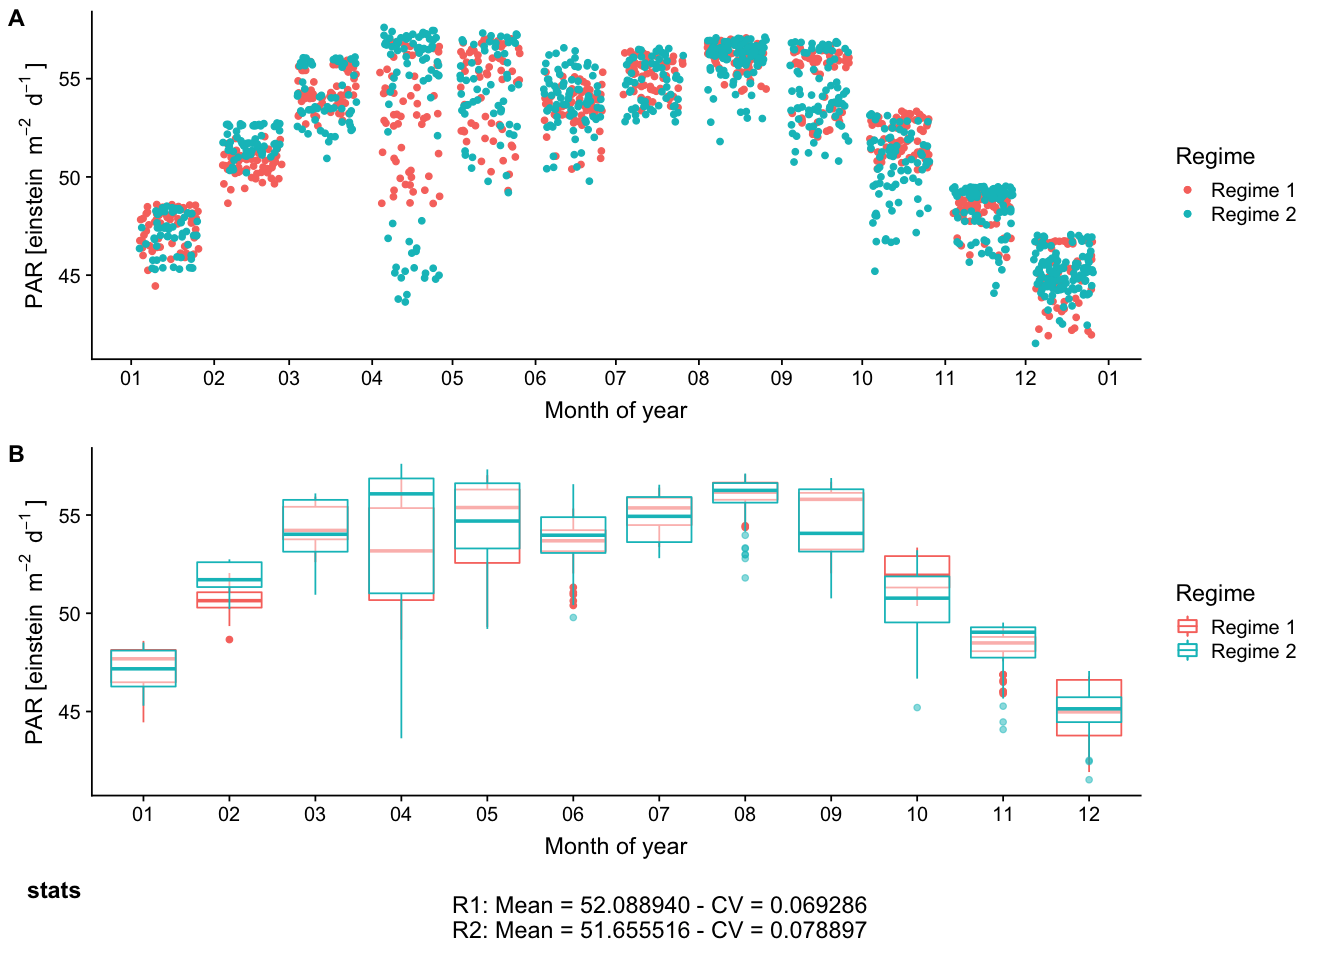

In [219]:
options(repr.plot.width=11, repr.plot.height=8)
PARmeanR1 <- mean(PARdf_allR1$value, na.rm=T)
PARmeanR2 <- mean(PARdf_allR2$value, na.rm=T)
PARcvR1 <- sd(PARdf_allR1$value, na.rm=T)/mean(PARdf_allR1$value, na.rm=T)
PARcvR2 <- sd(PARdf_allR2$value, na.rm=T)/mean(PARdf_allR2$value, na.rm=T)
PARstats <- ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", PARmeanR1, PARcvR1, PARmeanR2, PARcvR2))
plot_grid(PAR1, PAR2, PARstats, ncol = 1,labels = c("A", "B","stats"), rel_heights = c(1,1,0.2))

In [220]:
ggsave('PLOTS/PAR_splitperREGIME.png', width=11, height= 8)

In [59]:
PARdf <- SeaWIFs %>%
    group_by(Date) %>%
    summarise(PARmean = mean(value)) %>%
    select(Date, PARmean) %>%
    gather(key='key',value = "value", -Date)
head(PARdf)

Date,key,value
1997-10-15,PARmean,51.9604
1997-11-15,PARmean,48.6024
1997-12-15,PARmean,46.6760
1998-01-15,PARmean,48.3328
1998-02-15,PARmean,50.7080
1998-03-15,PARmean,54.1156


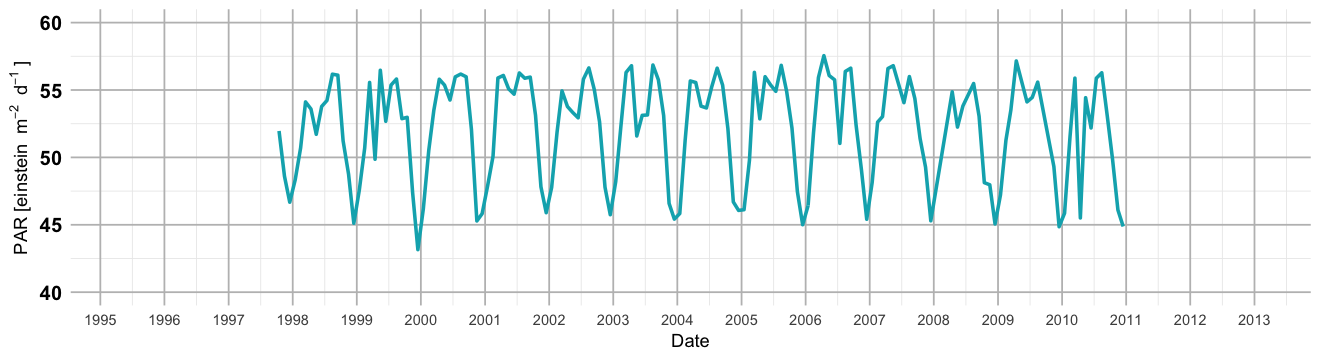

In [81]:
ggplot(PARdf, aes(x = Date, y = value)) + 
  geom_line(aes(color = key), size = 1) + 
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  scale_y_continuous(limits = c(40,60))+
  scale_x_date(date_breaks = "years", date_labels='%Y',limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
    ylab(bquote('PAR [einstein '~m^-2~ ~d^-1~']')) + theme(legend.position = "none")+ theme(legend.position = "none", 
                                     axis.text.y = element_text(face = "bold", color = "black", size = 12)) + theme(legend.position = "none")

In [82]:
ggsave('PLOTS/PAR_SeaWIFs_monthlyavg_entire_ts.png', width=11, height= 3)

# Euphotic depth over time from SeaWIFs 

In [14]:
head(SeaWIFs_Zeu_lee)

year,month,lon,lat,value,unit,var,Date
1997,10,-65.5886,10.536,77.530,m,Zeu_lee,1997-10-15
1997,10,-65.5042,10.536,82.240,m,Zeu_lee,1997-10-15
1997,10,-65.4198,10.536,84.450,m,Zeu_lee,1997-10-15
1997,10,-65.3354,10.536,87.830,m,Zeu_lee,1997-10-15
1997,10,-65.2510,10.536,88.200,m,Zeu_lee,1997-10-15
1997,10,-65.1666,10.536,85.845,m,Zeu_lee,1997-10-15


In [221]:
Zeu_lee_df_ALL <- SeaWIFs_Zeu_lee %>%
  select(Date, value) %>%
  gather(key='key',value = "value", -Date)
head(Zeu_lee_df_ALL)

Date,key,value
1997-10-15,value,77.530
1997-10-15,value,82.240
1997-10-15,value,84.450
1997-10-15,value,87.830
1997-10-15,value,88.200
1997-10-15,value,85.845


In [233]:
de<-data.frame(c(as.Date('1996-10-15'),as.Date('1995-10-15'),as.Date('2012-10-15'),as.Date('2013-10-15')),"value",NA)
names(de)<-c("Date","key","value")

Zeu_lee_df_ALL_new <- rbind(Zeu_lee_df_ALL, de)
tail(Zeu_lee_df_ALL_new)

,Date,key,value
3039,2010-12-15,value,61.055
3040,2010-12-15,value,61.590
3041,1996-10-15,value,NA
3042,1995-10-15,value,NA
3043,2012-10-15,value,NA
3044,2013-10-15,value,NA


Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”

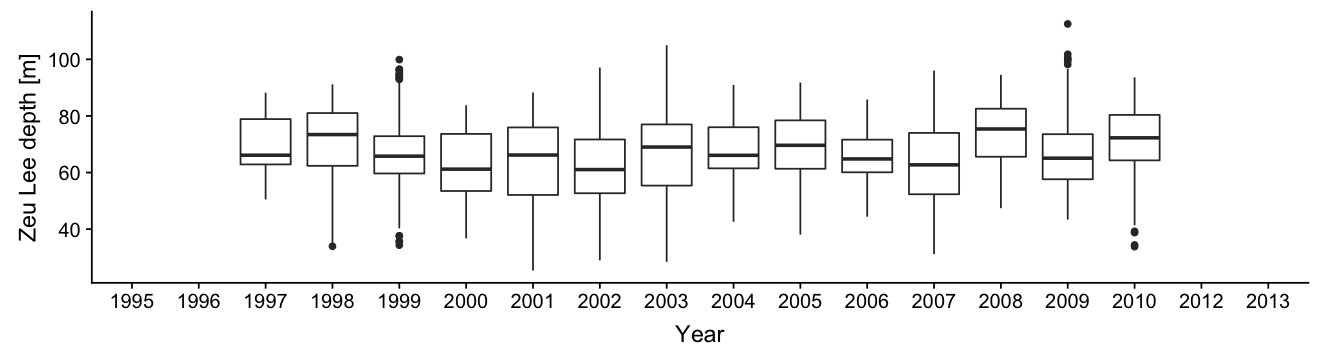

In [236]:
Zeu_lee_df_ALLTOT <- Zeu_lee_df_ALL_new
Zeu_lee_df_ALLTOT$monthyear <- as.Date(format(Zeu_lee_df_ALL_new$Date, format="%Y-%m"), format="%m-%d")
Zeu_lee_df_ALLTOT$year <- as.numeric(format(Zeu_lee_df_ALL_new$Date, format="%Y"))

options(repr.plot.width=11, repr.plot.height=3)
# plot boxplot of distribution over the year per group
ggplot(Zeu_lee_df_ALLTOT) + geom_boxplot(aes(x=reorder(year,monthyear), y=value))+ #scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
ylab('Zeu Lee depth [m]') + xlab('Year')

In [237]:
ggsave('PLOTS/ZEUlee_BOXPLOT_total.png', width=11, height= 3)

Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”

In [222]:
#split data into two regimes:
Zeu_lee_df_ALLR1 <- Zeu_lee_df_ALL[!Zeu_lee_df_ALL$Date>as.Date('2000-10-30') & !Zeu_lee_df_ALL$Date<as.Date('1996-01-01'),]
Zeu_lee_df_ALLR2 <- Zeu_lee_df_ALL[!Zeu_lee_df_ALL$Date<as.Date('2006-07-31') & !Zeu_lee_df_ALL$Date>as.Date('2010-12-31'),]

In [223]:
# create day of year and month columsn for aggregate plotting
Zeu_lee_df_ALLR1$dyear <- as.Date(format(Zeu_lee_df_ALLR1$Date, format="%m-%d"),format="%m-%d")
Zeu_lee_df_ALLR2$dyear <- as.Date(format(Zeu_lee_df_ALLR2$Date, format="%m-%d"),format="%m-%d")
Zeu_lee_df_ALLR1$month <- format(Zeu_lee_df_ALLR1$Date, format="%m")
Zeu_lee_df_ALLR2$month <- format(Zeu_lee_df_ALLR2$Date, format="%m")

In [227]:
options(repr.plot.width=11, repr.plot.height=3)

ZL1 <- ggplot() + geom_jitter(data=Zeu_lee_df_ALLR1,aes(x=dyear, y=value, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_jitter(data=Zeu_lee_df_ALLR2,aes(x=dyear, y=value, col='Regime 2')) + 
scale_x_date(date_breaks = "months", labels = date_format('%m'))+
ylab(bquote('Zeu Lee depth [m]')) + xlab('Month of year') + labs(col='Regime')

In [228]:
ZL2 <- ggplot() + geom_boxplot(data=Zeu_lee_df_ALLR1,aes(x=reorder(month,dyear), y=value, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_boxplot(data=Zeu_lee_df_ALLR2,aes(x=reorder(month,dyear), y=value, col='Regime 2'), alpha=0.5)+ 
#scale_x_continous(breaks = "months", labels = date_format('%m'))+
ylab(bquote('Zeu Lee depth [m]')) + xlab('Month of year') + labs(col='Regime')

Warning message:
“Removed 8 rows containing missing values (geom_point).”Warning message:
“Removed 8 rows containing non-finite values (stat_boxplot).”

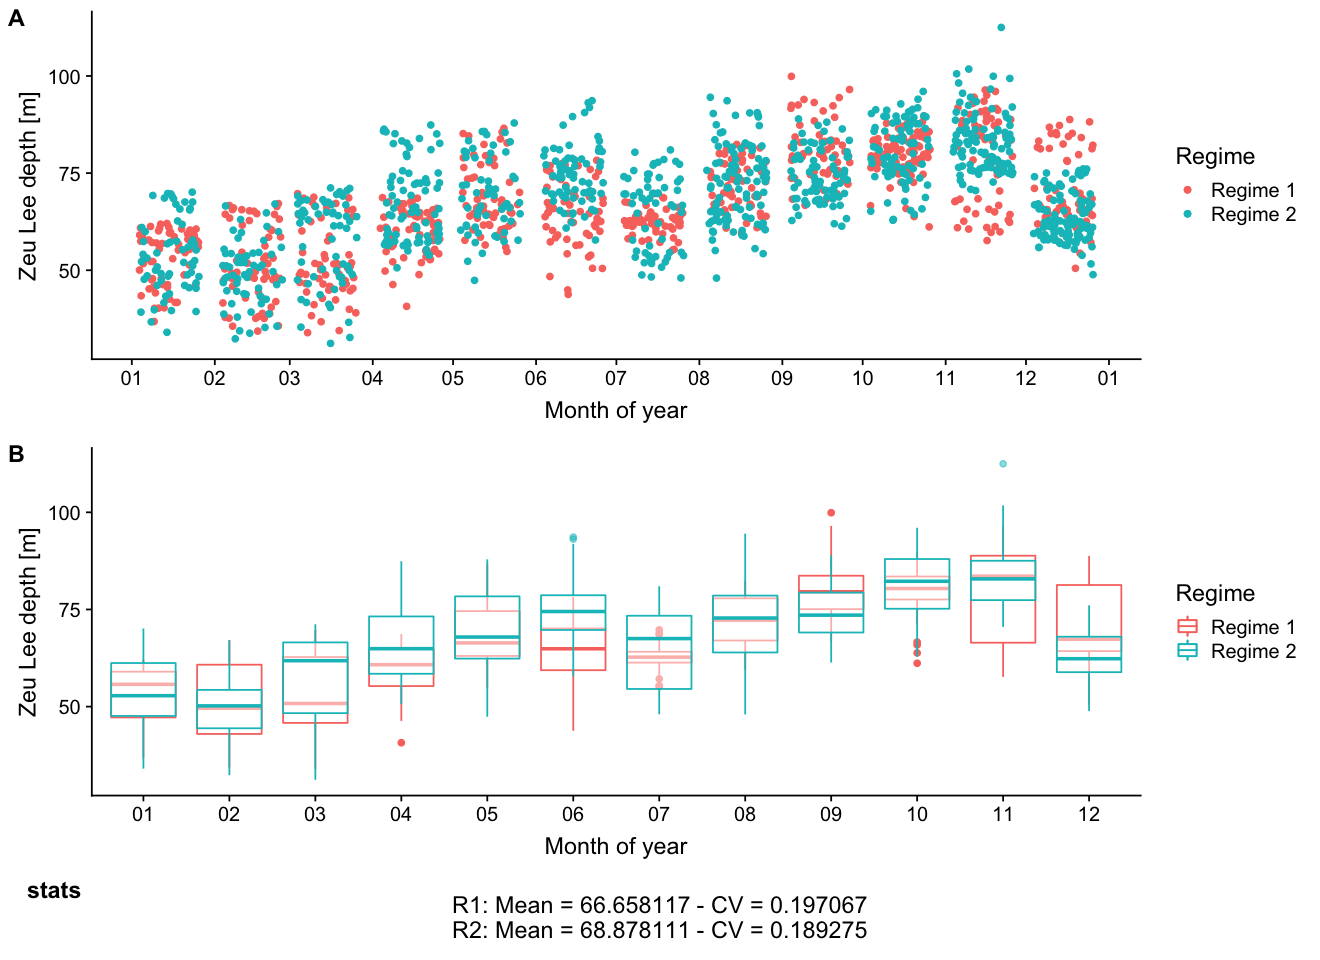

In [238]:
options(repr.plot.width=11, repr.plot.height=8)
Zeu_leemeanR1 <- mean(Zeu_lee_df_ALLR1$value, na.rm=T)
Zeu_leemeanR2 <- mean(Zeu_lee_df_ALLR2$value, na.rm=T)
Zeu_leecvR1 <- sd(Zeu_lee_df_ALLR1$value, na.rm=T)/mean(Zeu_lee_df_ALLR1$value, na.rm=T)
Zeu_leecvR2 <- sd(Zeu_lee_df_ALLR2$value, na.rm=T)/mean(Zeu_lee_df_ALLR2$value, na.rm=T)
Zeu_leestats <- ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", Zeu_leemeanR1, Zeu_leecvR1, Zeu_leemeanR2, Zeu_leecvR2))
plot_grid(ZL1, ZL2, Zeu_leestats, ncol = 1,labels = c("A", "B","stats"), rel_heights = c(1,1,0.2))

In [239]:
ggsave('PLOTS/ZEUlee_splitperREGIME.png', width=11, height= 8)

# Primary Production above MLD

In [387]:
head(niskinAboveMLD)

X,Date,X.x,Cruise_ID,Leg,lon.x,lat.x,Day,days.x,Month,⋯,sigma_t,sigma_0,potemp,sal,temp,beam_att,beam_cp,fluor_chla,belowmld,depthdiff
1,1999-02-10,756,93HG_039,1,-64.67,10.5,10,40,2,⋯,25.714,25.716,21.635,36.834,21.645,0.577,NA,0.325,TRUE,50.732
2,1999-02-10,757,93HG_039,1,-64.67,10.5,10,40,2,⋯,25.714,25.716,21.635,36.834,21.645,0.577,NA,0.325,TRUE,45.600
3,2002-02-14,1442,93HG_075,1,-64.67,10.5,14,44,2,⋯,25.578,25.581,22.177,36.859,22.186,NA,NA,NA,TRUE,44.522
4,2001-02-16,1213,93HG_063,1,-64.67,10.5,16,46,2,⋯,25.834,25.836,21.069,36.785,21.078,0.575,NA,1.595,TRUE,43.480
5,2012-02-07,3562,93HG_188,1,-64.67,10.5,7,37,2,⋯,25.652,25.654,21.724,36.787,21.732,0.109,0.473,0.240,TRUE,38.830
6,2002-02-14,1443,93HG_075,1,-64.67,10.5,14,44,2,⋯,25.578,25.581,22.177,36.859,22.186,NA,NA,NA,TRUE,38.641


In [391]:
PPabovedf <- niskinAboveMLD %>%
   group_by(Date) %>%
    summarise(PPmean = mean(PriPro)) %>%
  select(Date, PPmean) %>%
  gather(key='key',value = "value", -Date)
head(PPabovedf)

Date,key,value
1995-11-08,PPmean,NA
1995-12-13,PPmean,1.333333
1996-01-12,PPmean,NA
1996-02-13,PPmean,NA
1996-03-13,PPmean,10.640000
1996-04-16,PPmean,NA


Warning message:
“Removed 137 rows containing missing values (geom_point).”

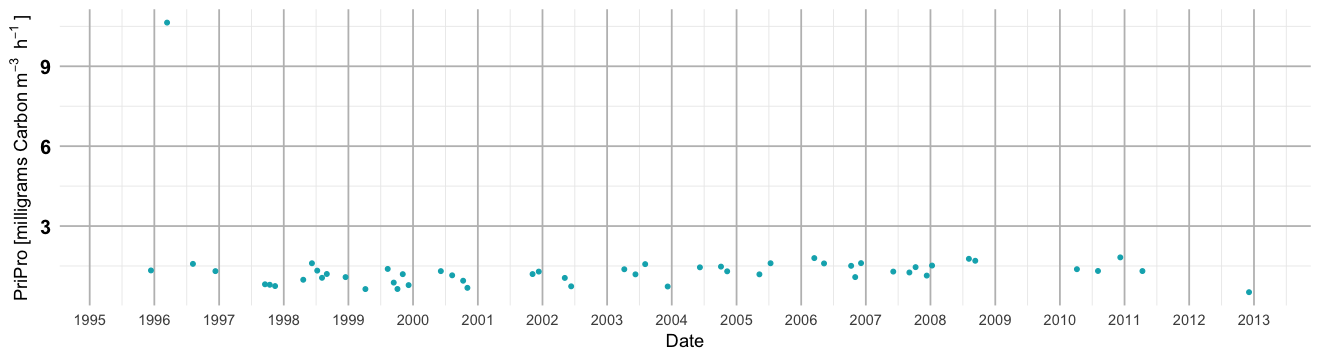

In [392]:
ggplot(PPabovedf, aes(x = Date, y = value)) + 
  geom_point(aes(color = key), size = 1) + 
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(limits = c(0,60))+
  scale_x_date(date_breaks = "years", date_labels='%Y', limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
    ylab(bquote('PriPro [milligrams Carbon'~m^-3~ ~h^-1~']')) + theme(legend.position = "none", 
                                     axis.text.y = element_text(face = "bold", color = "black", size = 12))

In [92]:
ggsave('PLOTS/PriPro_aboveMLD_entire_ts.png', width=11, height= 3)

Warning message:
“Removed 264 rows containing missing values (geom_point).”

# Chlorophyll A above MLD

In [243]:
head(niskinAboveMLD$C)

X,Date,X.x,Cruise_ID,Leg,lon.x,lat.x,Day,days.x,Month,⋯,sigma_t,sigma_0,potemp,sal,temp,beam_att,beam_cp,fluor_chla,belowmld,depthdiff
1,1999-02-10,756,93HG_039,1,-64.67,10.5,10,40,2,⋯,25.714,25.716,21.635,36.834,21.645,0.577,NA,0.325,TRUE,50.732
2,1999-02-10,757,93HG_039,1,-64.67,10.5,10,40,2,⋯,25.714,25.716,21.635,36.834,21.645,0.577,NA,0.325,TRUE,45.600
3,2002-02-14,1442,93HG_075,1,-64.67,10.5,14,44,2,⋯,25.578,25.581,22.177,36.859,22.186,NA,NA,NA,TRUE,44.522
4,2001-02-16,1213,93HG_063,1,-64.67,10.5,16,46,2,⋯,25.834,25.836,21.069,36.785,21.078,0.575,NA,1.595,TRUE,43.480
5,2012-02-07,3562,93HG_188,1,-64.67,10.5,7,37,2,⋯,25.652,25.654,21.724,36.787,21.732,0.109,0.473,0.240,TRUE,38.830
6,2002-02-14,1443,93HG_075,1,-64.67,10.5,14,44,2,⋯,25.578,25.581,22.177,36.859,22.186,NA,NA,NA,TRUE,38.641


In [245]:
ChlAabovedf_ALL <- niskinAboveMLD %>%
  select(Date, Chl) %>%
  gather(key='key',value = "value", -Date)
head(ChlAabovedf_ALL)

Date,key,value
1999-02-10,Chl,3.84
1999-02-10,Chl,2.89
2002-02-14,Chl,2.70
2001-02-16,Chl,3.84
2012-02-07,Chl,0.60
2002-02-14,Chl,2.61


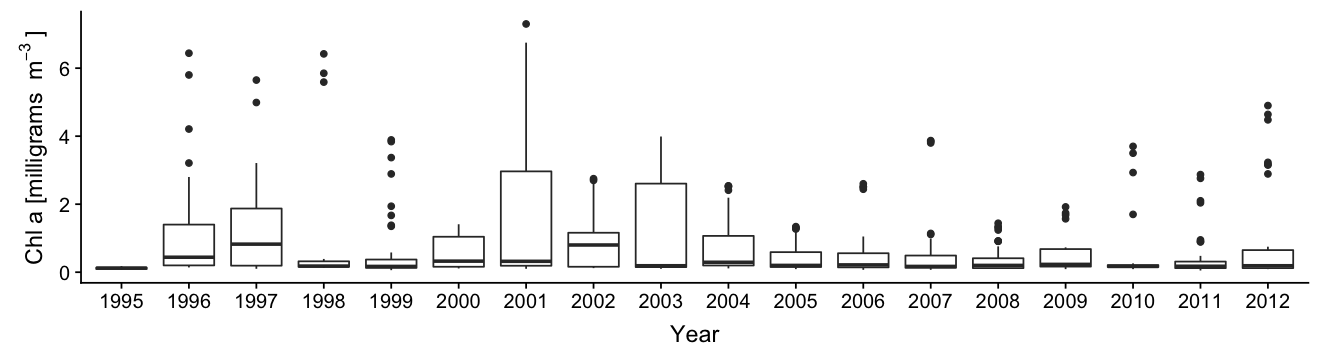

In [247]:
ChlAabovedf_ALLTOT <- ChlAabovedf_ALL
ChlAabovedf_ALLTOT$monthyear <- as.Date(format(ChlAabovedf_ALLTOT$Date, format="%Y-%m"), format="%m-%d")
ChlAabovedf_ALLTOT$year <- as.numeric(format(ChlAabovedf_ALLTOT$Date, format="%Y"))

options(repr.plot.width=11, repr.plot.height=3)
# plot boxplot of distribution over the year per group
ggplot(ChlAabovedf_ALLTOT) + geom_boxplot(aes(x=reorder(year,monthyear), y=value))+ 
#scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
ylab(bquote('Chl a [milligrams '~m^-3~']')) + xlab('Year')

In [248]:
ggsave('PLOTS/ChlA_BOXPLOT_total.png', width=11, height= 3)

In [249]:
#split data into two regimes:
ChlAabovedf_ALLR1 <- ChlAabovedf_ALL[!ChlAabovedf_ALL$Date>as.Date('2000-10-30') & !ChlAabovedf_ALL$Date<as.Date('1996-01-01'),]
ChlAabovedf_ALLR2 <- ChlAabovedf_ALL[!ChlAabovedf_ALL$Date<as.Date('2006-07-31') & !ChlAabovedf_ALL$Date>as.Date('2010-12-31'),]

In [250]:
# create day of year and month columsn for aggregate plotting
ChlAabovedf_ALLR1$dyear <- as.Date(format(ChlAabovedf_ALLR1$Date, format="%m-%d"),format="%m-%d")
ChlAabovedf_ALLR2$dyear <- as.Date(format(ChlAabovedf_ALLR2$Date, format="%m-%d"),format="%m-%d")
ChlAabovedf_ALLR1$month <- format(ChlAabovedf_ALLR1$Date, format="%m")
ChlAabovedf_ALLR2$month <- format(ChlAabovedf_ALLR2$Date, format="%m")

In [251]:
options(repr.plot.width=11, repr.plot.height=3)

ChlA1 <- ggplot() + geom_point(data=ChlAabovedf_ALLR1,aes(x=dyear, y=value, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_point(data=ChlAabovedf_ALLR2,aes(x=dyear, y=value, col='Regime 2')) + 
scale_x_date(date_breaks = "months", labels = date_format('%m'))+
ylab(bquote('Chl a [milligrams '~m^-3~']')) + xlab('Month of year') + labs(col='Regime')

In [252]:
ChlA2 <- ggplot() + geom_boxplot(data=ChlAabovedf_ALLR1,aes(x=reorder(month,dyear), y=value, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_boxplot(data=ChlAabovedf_ALLR2,aes(x=reorder(month,dyear), y=value, col='Regime 2'), alpha=0.5)+ 
#scale_x_continous(breaks = "months", labels = date_format('%m'))+
ylab(bquote('Chl a [milligrams '~m^-3~']')) + xlab('Month of year') + labs(col='Regime')

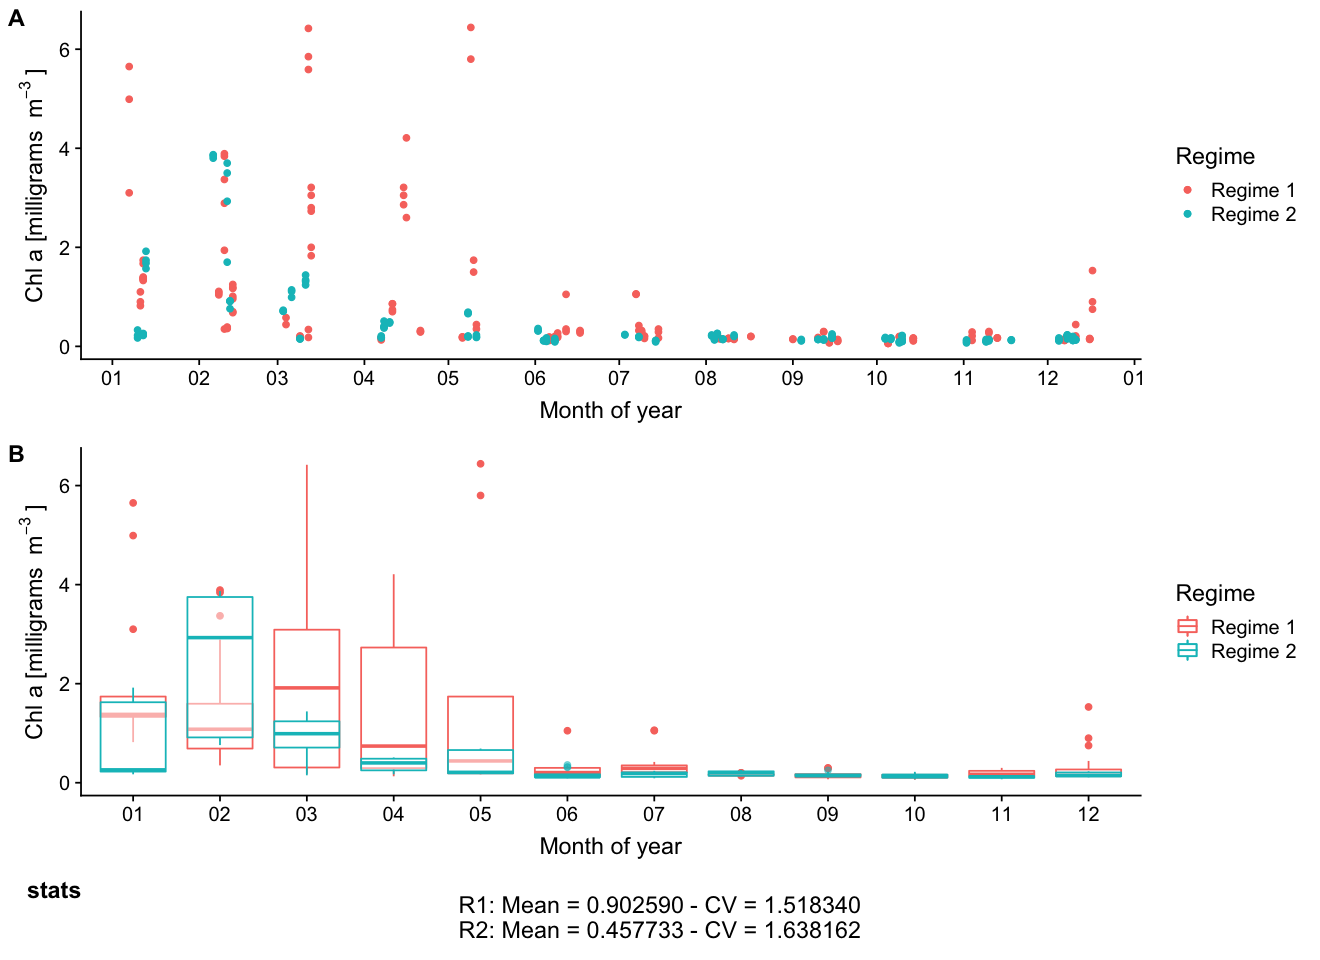

In [292]:
options(repr.plot.width=11, repr.plot.height=8)
ChlAmeanR1 <- mean(ChlAabovedf_ALLR1$value, na.rm=T)
ChlAmeanR2 <- mean(ChlAabovedf_ALLR2$value, na.rm=T)
ChlAcvR1 <- sd(ChlAabovedf_ALLR1$value, na.rm=T)/mean(ChlAabovedf_ALLR1$value, na.rm=T)
ChlAcvR2 <- sd(ChlAabovedf_ALLR2$value, na.rm=T)/mean(ChlAabovedf_ALLR2$value, na.rm=T)
ChlAstats <- ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", ChlAmeanR1, ChlAcvR1, ChlAmeanR2, ChlAcvR2))
plot_grid(ChlA1, ChlA2, ChlAstats, ncol = 1,labels = c("A", "B","stats"), rel_heights = c(1,1,0.2))

In [293]:
ggsave('PLOTS/ChlA_splitperREGIME.png', width=11, height= 8)

In [125]:
ChlAabovedf <- niskinAboveMLD %>%
    group_by(Date) %>%
    summarise(ChlAsum = mean(Chl)) %>%
  select(Date, ChlAsum) %>%
  gather(key='key',value = "value", -Date)
head(ChlAabovedf)

Date,key,value
1995-11-08,ChlAsum,0.095000
1995-12-13,ChlAsum,0.150000
1996-01-12,ChlAsum,1.460000
1996-02-13,ChlAsum,0.877500
1996-03-13,ChlAsum,2.913333
1996-04-16,ChlAsum,3.405000


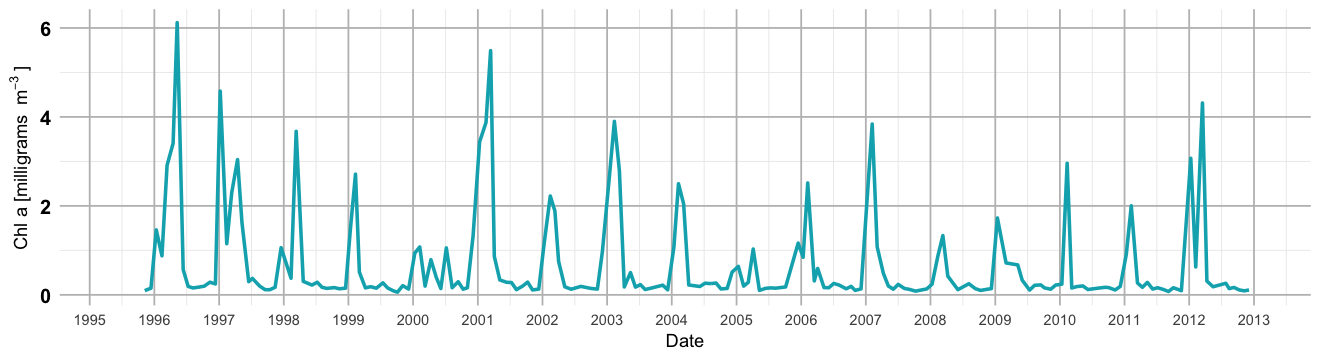

In [126]:
ggplot(ChlAabovedf, aes(x = Date, y = value)) + 
  geom_line(aes(color = key), size = 1) + 
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y', limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
    ylab(bquote('Chl a [milligrams '~m^-3~']')) + theme(legend.position = "none", 
                                     axis.text.y = element_text(face = "bold", color = "black", size = 12))

In [111]:
ggsave('PLOTS/ChlA_MEANaboveMLD_entire_ts.png', width=11, height= 3)

# Phytoplankton Abundances above MLD

In [19]:
names(phyto_above_MLD)

[1] "X"          "Date"       "X.1.x"      "X.x"        "CruiseID.x"
 [6] "lon.x"      "lat.x"      "date"       "month.x"    "year"      
[11] "depth"      "taxon"      "group"      "abundance"  "X.1.y"     
[16] "X.y"        "CruiseID.y" "month.y"    "days"       "press"     
[21] "lat.y"      "lon.y"      "sigma_t"    "sigma_0"    "potemp"    
[26] "sal"        "temp"       "beam_att"   "beam_cp"    "fluor_chla"
[31] "belowmld"   "depthdiff"

In [372]:
PhyTotAbundabovedf <- phyto_above_MLD[!phyto_above_MLD$group == 'TOTAL',] %>%
  group_by(Date) %>%
  summarize(TotAbund = sum(abundance)) %>%
  select(Date, TotAbund) %>%
  gather(key='key',value = "value", -Date)
PhyTotAbundabovedf$Date <- as.Date(PhyTotAbundabovedf$Date)
str(PhyTotAbundabovedf)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	170 obs. of  3 variables:
 $ Date : Date, format: "1995-11-08" "1995-12-13" ...
 $ key  : chr  "TotAbund" "TotAbund" "TotAbund" "TotAbund" ...
 $ value: num  790 3678 5366 5191 5757 ...


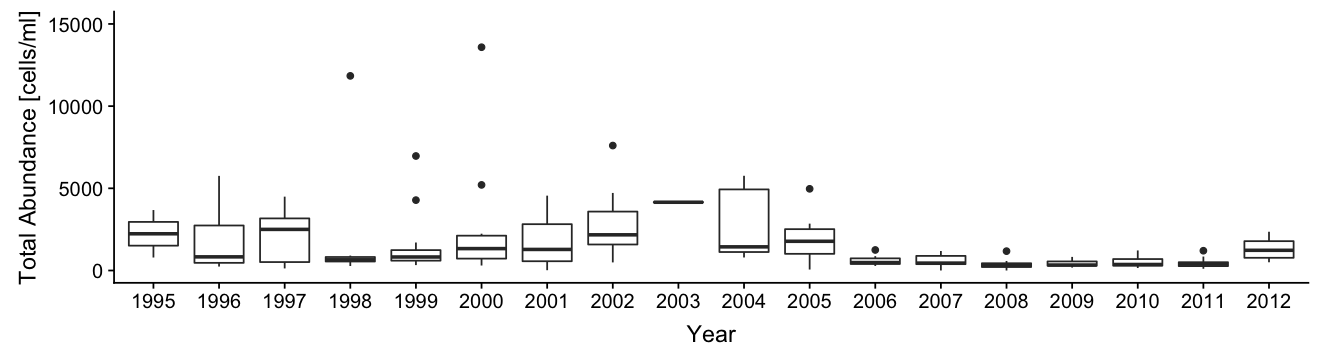

In [383]:
PhyTotabovedf_ALLTOT <- PhyTotAbundabovedf
PhyTotabovedf_ALLTOT$monthyear <- as.Date(format(PhyTotAbundabovedf$Date, format="%Y-%m"), format="%m-%d")
PhyTotabovedf_ALLTOT$year <- as.numeric(format(PhyTotAbundabovedf$Date, format="%Y"))

options(repr.plot.width=11, repr.plot.height=3)
# plot boxplot of distribution over the year per group
ggplot(PhyTotabovedf_ALLTOT) + geom_boxplot(aes(x=reorder(year,monthyear), y=value))+ 
#scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
ylab('Total Abundance [cells/ml]') + xlab('Year')+ ylim(0,15000)

In [384]:
ggsave('PLOTS/TotAbund_ABOVE_BOXPLOT_total.png', width=11, height= 3)

In [378]:
#PhytoAbundances above MLD
Phyto_below_MLD <- read.csv("DATA_processed/Phyto_below_MLD.csv")
Phyto_below_MLD$date <- as.Date(Phyto_below_MLD$Date, format="%Y-%m-%d")


In [379]:
PhyTotAbundbelowdf <- Phyto_below_MLD[!Phyto_below_MLD$group == 'TOTAL',] %>%
  group_by(Date) %>%
  summarize(TotAbund = sum(abundance)) %>%
  select(Date, TotAbund) %>%
  gather(key='key',value = "value", -Date)
PhyTotAbundbelowdf$Date <- as.Date(PhyTotAbundbelowdf$Date)
str(PhyTotAbundbelowdf)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	170 obs. of  3 variables:
 $ Date : Date, format: "1995-11-08" "1995-12-13" ...
 $ key  : chr  "TotAbund" "TotAbund" "TotAbund" "TotAbund" ...
 $ value: num  1329 2285 5444 3910 1184 ...


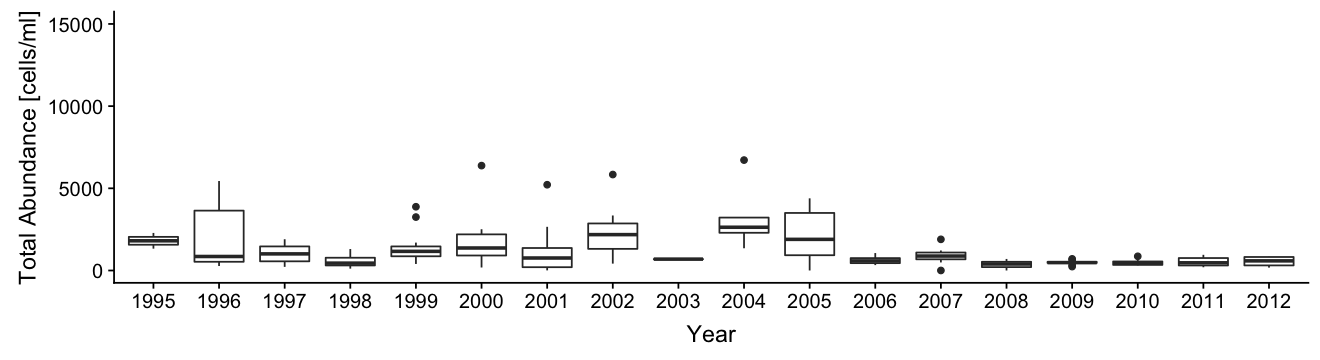

In [385]:
PhyTotbelowdf_ALLTOT <- PhyTotAbundbelowdf
PhyTotbelowdf_ALLTOT$monthyear <- as.Date(format(PhyTotAbundbelowdf$Date, format="%Y-%m"), format="%m-%d")
PhyTotbelowdf_ALLTOT$year <- as.numeric(format(PhyTotAbundbelowdf$Date, format="%Y"))

options(repr.plot.width=11, repr.plot.height=3)
# plot boxplot of distribution over the year per group
ggplot(PhyTotbelowdf_ALLTOT) + geom_boxplot(aes(x=reorder(year,monthyear), y=value))+ 
#scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
ylab('Total Abundance [cells/ml]') + xlab('Year') + ylim(0,15000)

In [386]:
ggsave('PLOTS/TotAbund_BELOW_BOXPLOT_total.png', width=11, height= 3)

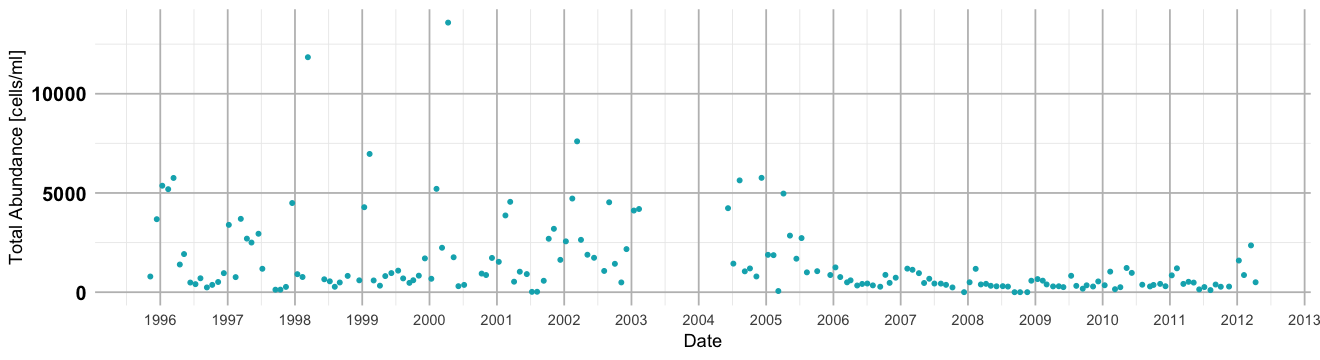

In [374]:
ggplot(PhyTotAbundabovedf, aes(x = Date, y = value)) + 
  geom_point(aes(color = key), size = 1) + 
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y')+
    ylab('Total Abundance [cells/ml]') + theme(legend.position = "none") + theme(legend.position = "none", 
                                     axis.text.y = element_text(face = "bold", color = "black", size = 12))

In [375]:
ggsave('PLOTS/Phyto_Tot_Abund_aboveMLD.png', width=11, height= 3)

In [376]:
PhyTotAbunddf <- phyto_filtered[!phyto_filtered$group == 'TOTAL',] %>%
  group_by(date) %>%
  summarize(TotAbund = sum(abundance)) %>%
  select(date, TotAbund) %>%
  gather(key='key',value = "value", -date)
PhyTotAbunddf$Date <- as.Date(PhyTotAbunddf$date)
str(PhyTotAbunddf)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	170 obs. of  4 variables:
 $ date : Date, format: "1995-11-08" "1995-12-13" ...
 $ key  : chr  "TotAbund" "TotAbund" "TotAbund" "TotAbund" ...
 $ value: num  2119 5964 10810 9100 6941 ...
 $ Date : Date, format: "1995-11-08" "1995-12-13" ...


Warning message in value - PhyGroupAbundabovedf$value:
“longer object length is not a multiple of shorter object length”Warning message in value - PhyGroupAbundabovedf$value:
“longer object length is not a multiple of shorter object length”ERROR while rich displaying an object: Error: Aesthetics must be either length 1 or the same as the data (170): colour, x, y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.defaul

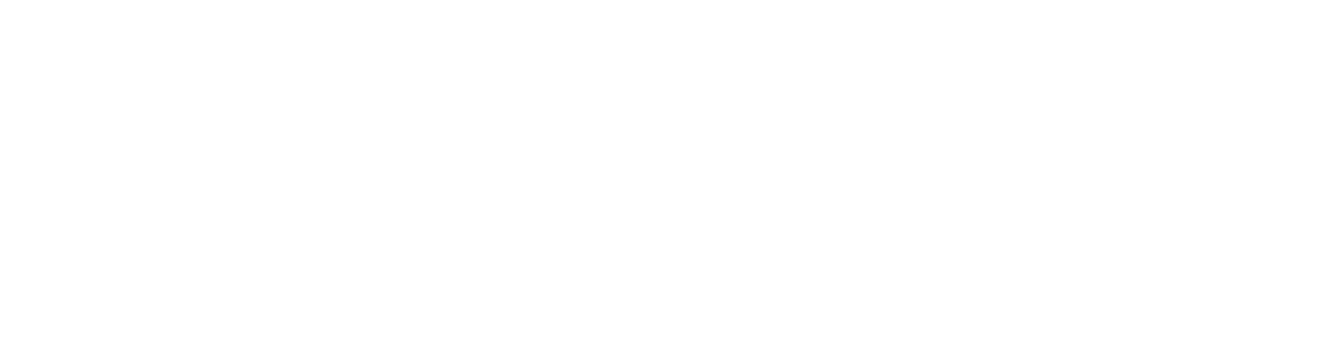

In [377]:
ggplot(PhyTotAbunddf, aes(x = Date, y = value)) + 
  geom_point(aes(color = key), size = 1) + 
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y')+
    ylab('Total Abundance [cells/ml]') + theme(legend.position = "none")  + theme(legend.position = "none", 
                                     axis.text.y = element_text(face = "bold", color = "black", size = 12))

In [136]:
ggsave('PLOTS/Phyto_Tot_Abund_allDEPTH.png', width=11, height= 3)

In [262]:
PhyGroupAbundabovedf <- phyto_above_MLD[!phyto_above_MLD$group == 'TOTAL',] %>%
  group_by(Date,group) %>%
  summarize(GroupAbund = sum(abundance)) %>%
  select(Date, group, GroupAbund) %>%
  gather(key='key',value = "value", -Date,-group)
PhyGroupAbundabovedf$Date <- as.Date(PhyGroupAbundabovedf$Date)
head(PhyGroupAbundabovedf)

Date,group,key,value
1995-11-08,COCCOLITHOPHORIDS,GroupAbund,1.000
1995-11-08,CYANOBACTERIA,GroupAbund,2.500
1995-11-08,DIATOMS,GroupAbund,228.125
1995-11-08,DINOFLAGELLATES,GroupAbund,45.000
1995-11-08,NANOFLAGELLATES,GroupAbund,513.218
1995-11-08,OTHERS,GroupAbund,0.000


Warning message:
“Transformation introduced infinite values in continuous y-axis”

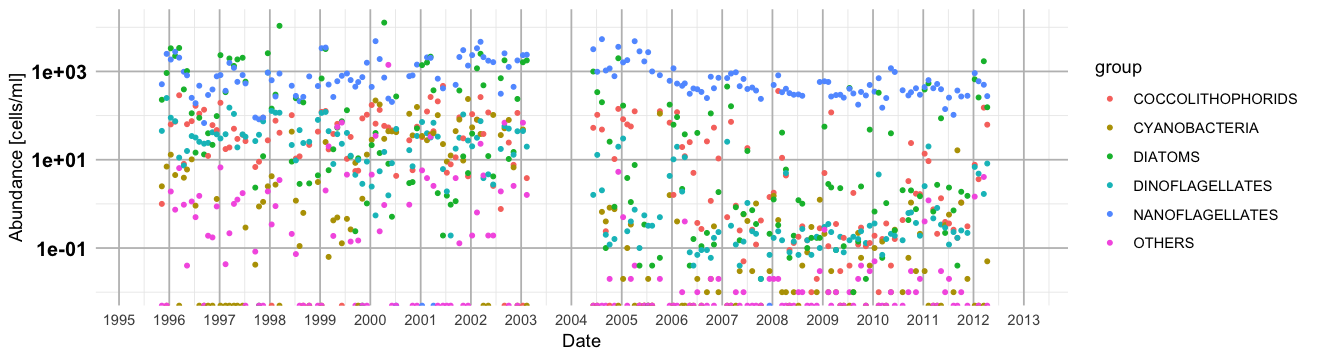

In [142]:
ggplot(PhyGroupAbundabovedf, aes(x = Date, y = value)) + 
  geom_point(aes(color = group), size = 1) + 
  #scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+ scale_y_log10()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y', limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
    ylab('Abundance [cells/ml]') + theme(axis.text.y = element_text(face = "bold", color = "black", size = 12))

In [143]:
ggsave('PLOTS/Phyto_PerGROUP_Abund_aboveMLD.png', width=11, height= 3)

Warning message:
“Transformation introduced infinite values in continuous y-axis”

 # TOTAL ABUNDANCE PER GROUP FOR RANKING

In [260]:
PhyGrouptotabund <- phyto_above_MLD[!phyto_above_MLD$group == 'TOTAL',] %>%
  group_by(group) %>%
  summarize(GroupAbund = sum(abundance)) %>%
  select(group, GroupAbund) %>%
  gather(key='key',value = "value",-group)
#PhyGroupAbundabovedf$Date <- as.Date(PhyGroupAbundabovedf$Date)
head(PhyGrouptotabund)

group,key,value
COCCOLITHOPHORIDS,GroupAbund,7250.349
CYANOBACTERIA,GroupAbund,2348.154
DIATOMS,GroupAbund,80008.609
DINOFLAGELLATES,GroupAbund,4375.259
NANOFLAGELLATES,GroupAbund,154883.941
OTHERS,GroupAbund,1870.889


In [183]:
head(PhyGroupAbundabovedf$group)

[1] COCCOLITHOPHORIDS CYANOBACTERIA     DIATOMS           DINOFLAGELLATES  
[5] NANOFLAGELLATES   OTHERS           
7 Levels: COCCOLITHOPHORIDS CYANOBACTERIA DIATOMS ... TOTAL

Warning message:
“Transformation introduced infinite values in continuous y-axis”

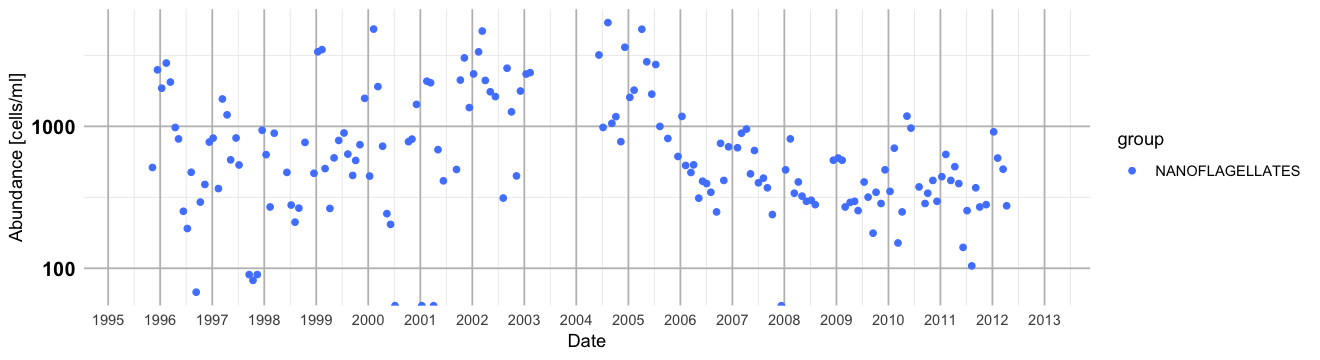

In [263]:
options(repr.plot.width=11, repr.plot.height=3)
facets <- c("COCCOLITHOPHORIDS", "CYANOBACTERIA", "DIATOMS", "DINOFLAGELLATES", "NANOFLAGELLATES","OTHERS")
colors <- c('#f35e5a','#a89005','#17b12b','#17b3b7','#5086ff','#ef43dc')
names(colors) <- facets

# plot each group inidividually
ggplot(PhyGroupAbundabovedf[PhyGroupAbundabovedf$group == facets[5],], aes(x = Date, y = value, col=group)) + 
  geom_point() + 
  scale_color_manual(values = colors) +
  theme_minimal()+ scale_y_log10()+
  theme(panel.grid.major = element_line(colour = 'grey')) + 
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y', limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
    ylab('Abundance [cells/ml]') + theme(axis.text.y = element_text(face = "bold", color = "black", size = 12))

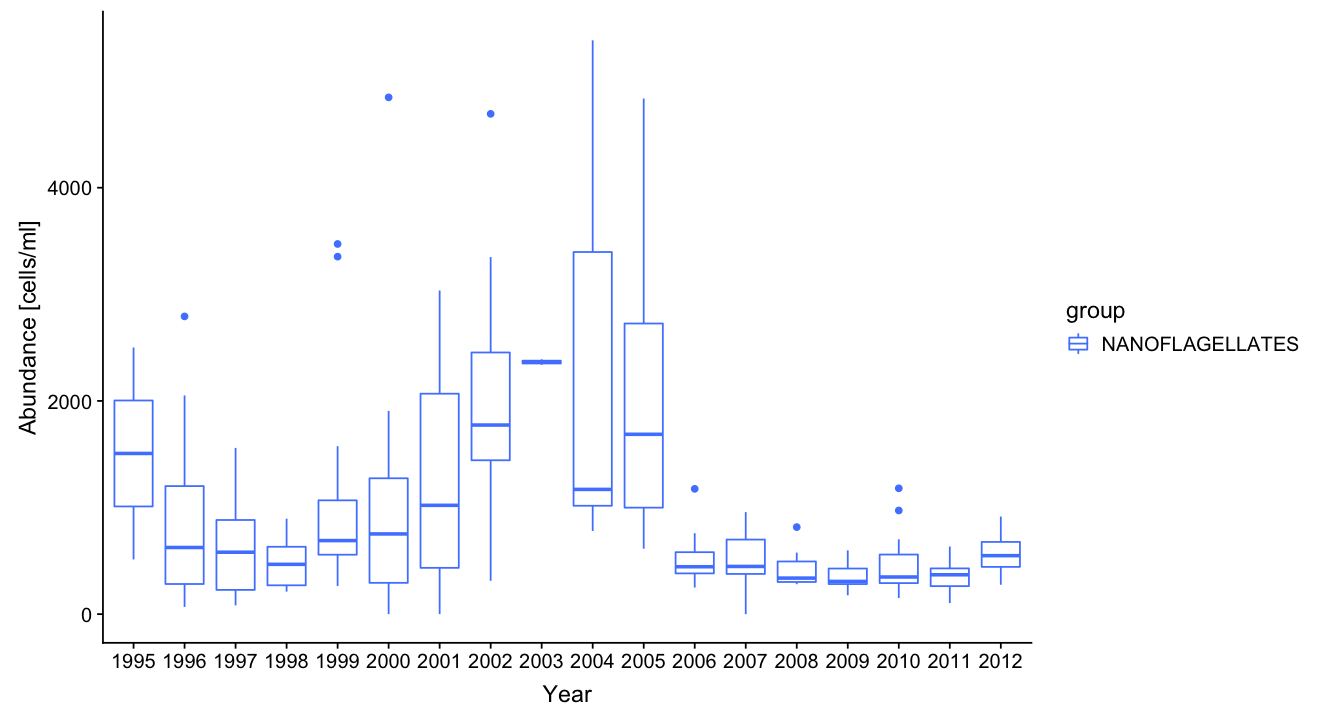

In [285]:
PhyGroupabovedf_ALLTOT <- PhyGroupAbundabovedf
PhyGroupabovedf_ALLTOT$monthyear <- as.Date(format(PhyGroupAbundabovedf$Date, format="%Y-%m"), format="%m-%d")
PhyGroupabovedf_ALLTOT$year <- as.numeric(format(PhyGroupAbundabovedf$Date, format="%Y"))

options(repr.plot.width=11, repr.plot.height=6)
# plot boxplot of distribution over the year per group
ggplot(PhyGroupabovedf_ALLTOT[PhyGroupabovedf_ALLTOT$group == facets[5],]) + 
geom_boxplot(aes(x=reorder(year,monthyear), y=value, col=group))+ 
scale_color_manual(values = colors) +
#scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
ylab('Abundance [cells/ml]') + xlab('Year')

In [286]:
ggsave('PLOTS/Phyto_TIMESERIES_NANO.png', width=11, height= 6)

In [287]:
#split data into two regimes:
PGA_R1 <- PhyGroupAbundabovedf[!PhyGroupAbundabovedf$Date>as.Date('2000-10-30') & !PhyGroupAbundabovedf$Date<as.Date('1996-01-01'),]
PGA_R2 <- PhyGroupAbundabovedf[!PhyGroupAbundabovedf$Date<as.Date('2006-07-31') & !PhyGroupAbundabovedf$Date>as.Date('2010-12-31'),]




In [288]:
# create day of year and month columsn for aggregate plotting
PGA_R1$dyear <- as.Date(format(PGA_R1$Date, format="%m-%d"),format="%m-%d")
PGA_R2$dyear <- as.Date(format(PGA_R2$Date, format="%m-%d"),format="%m-%d")
PGA_R1$month <- format(PGA_R1$Date, format="%m")
PGA_R2$month <- format(PGA_R2$Date, format="%m")

In [328]:
options(repr.plot.width=11, repr.plot.height=3)

pf <- facets[5]

PGA1 <- ggplot() + geom_point(data=PGA_R1[PGA_R1$group == pf,],aes(x=dyear, y=value, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_point(data=PGA_R2[PGA_R2$group == pf,],aes(x=dyear, y=value, col='Regime 2')) + 
scale_x_date(date_breaks = "months", labels = date_format('%m'))+
ylab('Abundance [cells/ml]') + xlab('Month of year') + labs(col='Regime')

In [329]:
PGA2 <- ggplot() + geom_boxplot(data=PGA_R1[PGA_R1$group == pf,],aes(x=reorder(month,dyear), y=value, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_boxplot(data=PGA_R2[PGA_R2$group == pf,],aes(x=reorder(month,dyear), y=value, col='Regime 2'), alpha=0.5)+ 
#scale_x_continous(breaks = "months", labels = date_format('%m'))+
ylab('Abundance [cells/ml]') + xlab('Month of year') + labs(col='Regime')

In [330]:
mean(PGA_R1[PGA_R1$group == pf,]$value, na.rm=T)

[1] 871.712

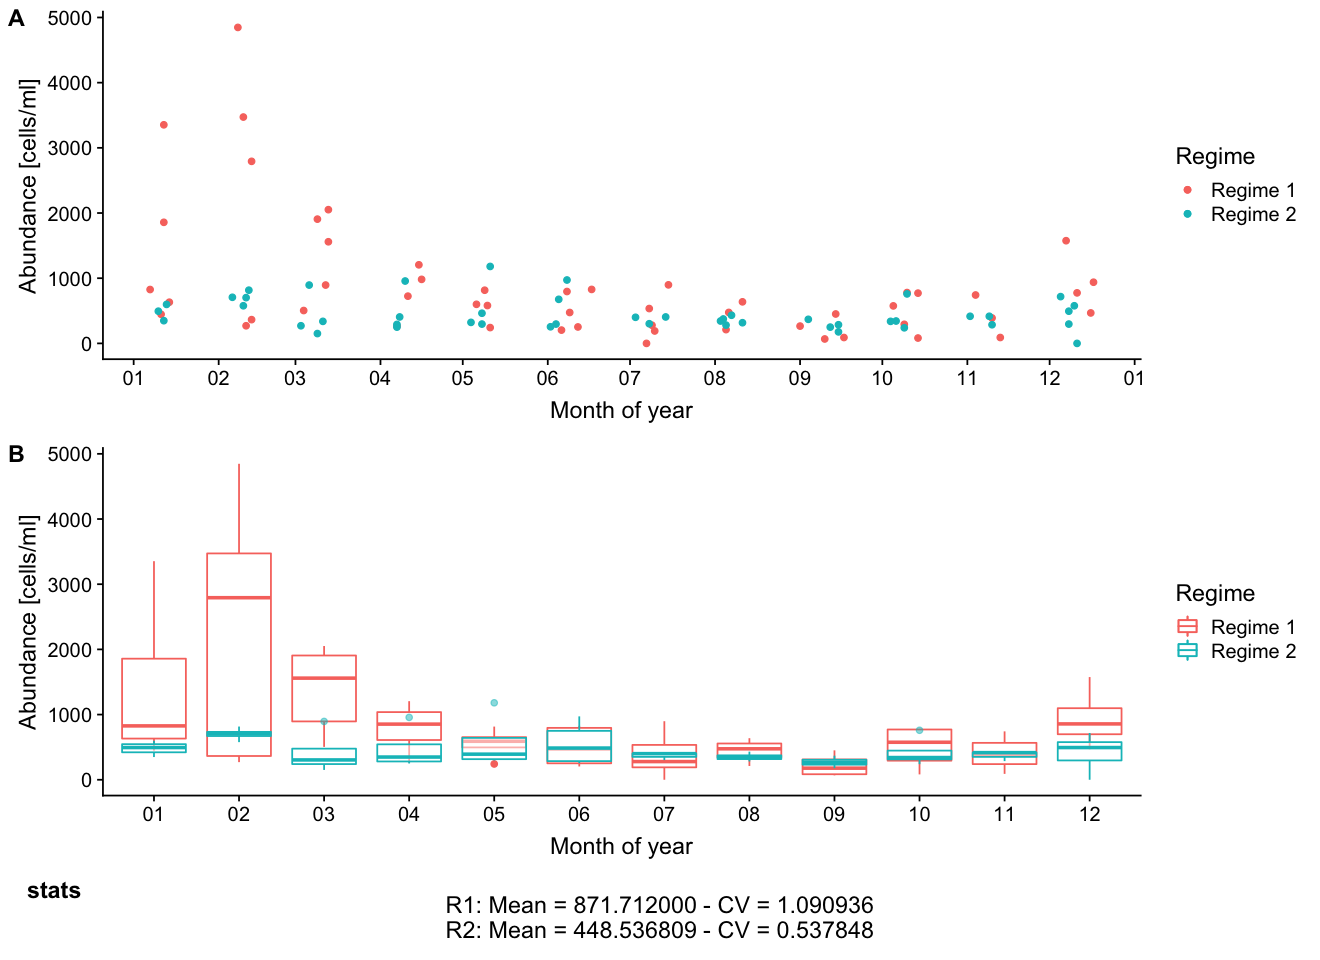

In [331]:
options(repr.plot.width=11, repr.plot.height=8)
PGAmeanR1 <- mean(PGA_R1[PGA_R1$group == pf,]$value, na.rm=T)
PGAmeanR2 <- mean(PGA_R2[PGA_R2$group == pf,]$value, na.rm=T)
PGAcvR1 <- sd(PGA_R1[PGA_R1$group == pf,]$value, na.rm=T)/mean(PGA_R1[PGA_R1$group == pf,]$value, na.rm=T)
PGAcvR2 <- sd(PGA_R2[PGA_R2$group == pf,]$value, na.rm=T)/mean(PGA_R2[PGA_R2$group == pf,]$value, na.rm=T)
PGAstats <- ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", PGAmeanR1, PGAcvR1, PGAmeanR2, PGAcvR2))
plot_grid(PGA1, PGA2, PGAstats, ncol = 1,labels = c("A", "B","stats"), rel_heights = c(1,1,0.2))

In [332]:
pf

[1] "NANOFLAGELLATES"

In [333]:
ggsave('PLOTS/Phyto_REGIMESSSSS_NANO.png', width=11, height= 8)

In [199]:
ggsave('PLOTS/Phyto_indGroup_OTHERS.png', width=11, height= 3)

Warning message:
“Transformation introduced infinite values in continuous y-axis”

# Zooplankton Abundances

In [55]:
head(zoo)

X,CRUISE,Date,YEAR,MONTH,Analyst,Mesh.Size,TOTAL.DENSITY,BIOMASS,ASH,⋯,APPENDICULARIANS,SALPS,DOLIOLIDS,BIVALVES,H.CRUSTACEA,L.ANFIOXUS,LUCIFER,JUV..GASTROPOD,yday,date
1,71,2001-10-09,2001,10,Javier Gutierrez,500,213,15.9,3.3,⋯,9.36,1.83,NA,NA,NA,,NA,,281,2001-10-09
20,72,2001-11-06,2001,11,Javier Gutierrez,500,13,2.3,0.1,⋯,0.52,0.52,NA,NA,NA,,NA,,309,2001-11-06
39,73,2001-12-11,2001,12,Javier Gutierrez,500,9,0.7,0.2,⋯,0.22,0.03,NA,0.03,0.26,,NA,,344,2001-12-11
58,74,2002-01-10,2002,1,Javier Gutierrez,500,105,4.9,0.18,⋯,0.10,18.00,NA,0.00,0.30,,0.4,,9,2002-01-10
59,74,2002-01-10,2002,1,Javier Gutierrez,200,499,10.2,0.5,⋯,3.20,37.30,NA,1.60,1.60,n.d.,NA,n.d.,9,2002-01-10
96,75,2002-02-14,2002,2,Javier Gutierrez,200,612,12.9,2.6,⋯,5.00,1.70,NA,NA,3.30,n.d.,NA,n.d.,44,2002-02-14


In [334]:
ZOOdf <- zoo %>%
  select(date, BIOMASS, Mesh.Size) %>%
  gather(key='key',value = "value", -date, -Mesh.Size)
head(ZOOdf)

date,Mesh.Size,key,value
2001-10-09,500,BIOMASS,15.9
2001-11-06,500,BIOMASS,2.3
2001-12-11,500,BIOMASS,0.7
2002-01-10,500,BIOMASS,4.9
2002-01-10,200,BIOMASS,10.2
2002-02-14,200,BIOMASS,12.9


In [366]:
dateextend<-data.frame(c(as.Date('1995-10-15'),as.Date('1996-10-15'),as.Date('1997-10-15'),as.Date('1998-10-15'),
                         as.Date('1999-10-15'),as.Date('2000-10-15'),as.Date('2001-10-15')),200,"value",NA)
names(dateextend)<-c("date","Mesh.Size","key","value")

ZOOdf_new <- rbind(ZOOdf, dateextend)
tail(ZOOdf_new)

,date,Mesh.Size,key,value
305,1996-10-15,200,value,NA
306,1997-10-15,200,value,NA
307,1998-10-15,200,value,NA
308,1999-10-15,200,value,NA
309,2000-10-15,200,value,NA
310,2001-10-15,200,value,NA


Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”

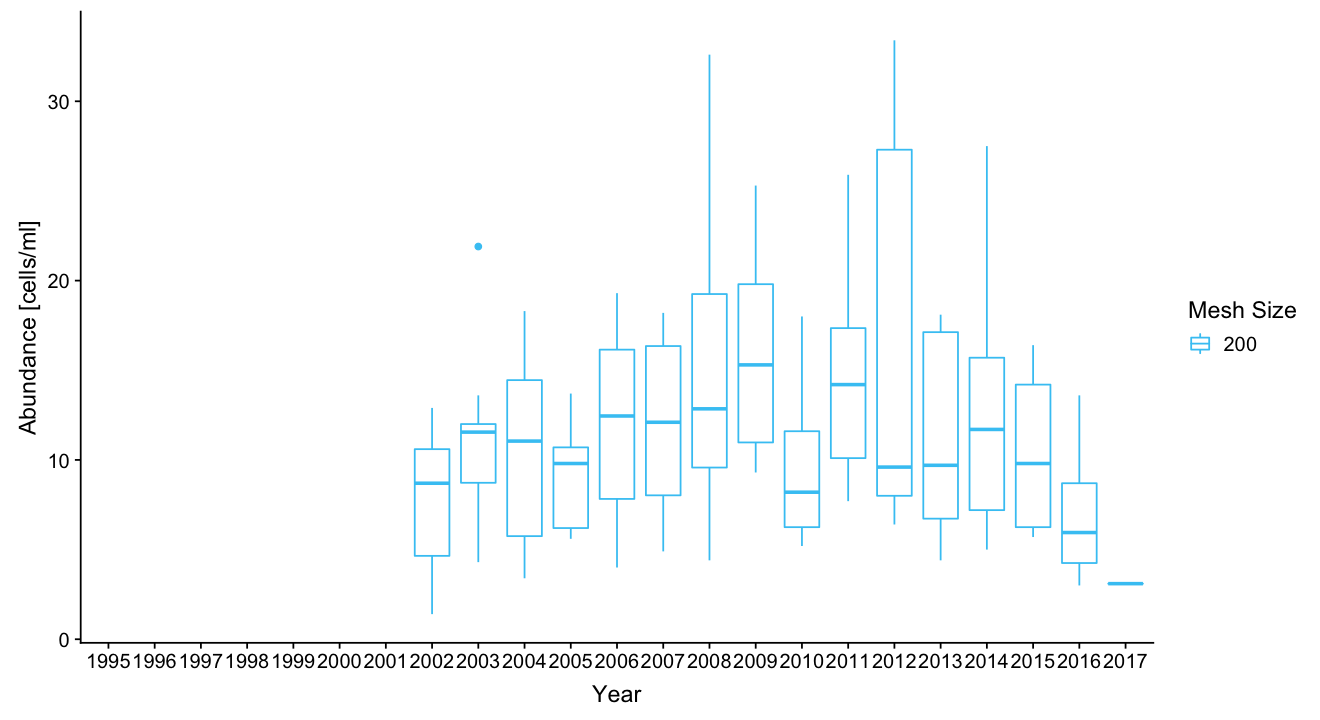

In [368]:
ZOOdf_ALLTOT <- ZOOdf_new
ZOOdf_ALLTOT$monthyear <- as.Date(format(ZOOdf_new$date, format="%Y-%m"), format="%m-%d")
ZOOdf_ALLTOT$year <- as.numeric(format(ZOOdf_new$date, format="%Y"))

options(repr.plot.width=11, repr.plot.height=6)
# plot boxplot of distribution over the year per group
ggplot(ZOOdf_ALLTOT[ZOOdf_ALLTOT$Mesh.Size == 200,]) + 
geom_boxplot(aes(x=reorder(year,monthyear), y=value, col=as.factor(Mesh.Size)))+ 
scale_color_manual(values=c("#41c7f4","#f4aa42")) +
#scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
ylab('Abundance [cells/ml]') + xlab('Year') + labs(col='Mesh Size')

In [369]:
ggsave('PLOTS/ZOO_200_Boxplot_TimeSeries.png', width=11, height= 6)

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”

Warning message:
“Removed 67 rows containing missing values (geom_point).”

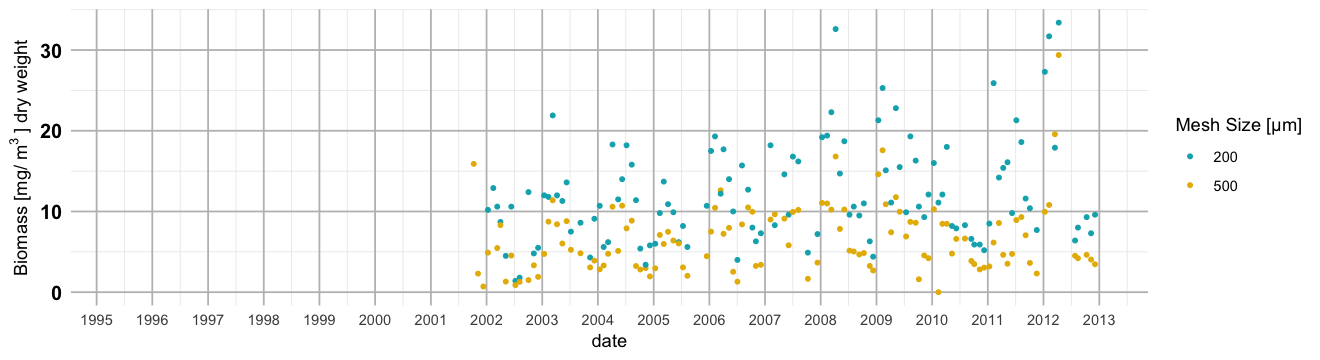

In [208]:
ggplot(ZOOdf, aes(x = date, y = value)) + 
  geom_point(aes(color = as.factor(Mesh.Size)), size = 1) + 
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y',limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
    ylab(bquote('Biomass [mg '~m^-3~'] dry weight'))+ labs(color = "Mesh Size [µm]") + 
    theme(axis.text.y = element_text(face = "bold", color = "black", size = 12))#+ theme(legend.position = "none")

In [209]:
ggsave('PLOTS/ZOOplankton_all_timeseries.png', width=11, height= 3)

Warning message:
“Removed 67 rows containing missing values (geom_point).”

# look at regression here, possibily interpolate to regime 1
fit a regression through the data, and see how it changes  
look at the seasonal component, and look at multi-decadal variability  
also with the regimes  
between regimes variability should be higher  
and the within regimes variability should be lower... for example  